# Downloading the data

In [ ]:
!pip install zarr
!pip install fsspec
!pip install cartopy
!pip install cftime
!pip install os
!pip install --upgrade git+https://github.com/pangeo-data/xESMF.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
  Cloning https://github.com/pangeo-data/xESMF.git to /tmp/pip-req-build-wnqyxqvv
  Running command git clone --filter=blob:none --quiet https://github.com/pangeo-data/xESMF.git /tmp/pip-req-build-wnqyxqvv
  Resolved https://github.com/pangeo-data/xESMF.git to commit feebcfc11147eb00e3256924f0fded1485b7df60
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import scipy.stats as stats
import zarr
import fsspec
import cartopy.crs as ccrs
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

activity_id institution_id     source_id       experiment_id member_id  \
0  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
1  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
2  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
3  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
4  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   

  table_id variable_id grid_label  \
0     Amon          ps         gn   
1     Amon        rsds         gn   
2     Amon        rlus         gn   
3     Amon        rlds         gn   
4     Amon         psl         gn   

                                              zstore  dcpp_init_year   version  
0  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
1  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
2  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
3  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
4  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706

In [ ]:
df_ta = df.query("table_id == 'day' & variable_id == 'tasmin' & member_id == 'r1i1p1f1'")
df_ta

activity_id institution_id      source_id  experiment_id member_id  \
863            CMIP      NOAA-GFDL       GFDL-CM4      piControl  r1i1p1f1   
869            CMIP      NOAA-GFDL       GFDL-CM4      piControl  r1i1p1f1   
922            CMIP      NOAA-GFDL      GFDL-ESM4       esm-hist  r1i1p1f1   
1029           CMIP      NOAA-GFDL      GFDL-ESM4  esm-piControl  r1i1p1f1   
1962           CMIP      NOAA-GFDL      GFDL-ESM4        1pctCO2  r1i1p1f1   
...             ...            ...            ...            ...       ...   
515185         CMIP           CMCC      CMCC-ESM2      piControl  r1i1p1f1   
516046  ScenarioMIP   CSIRO-ARCCSS     ACCESS-CM2         ssp585  r1i1p1f1   
516322  ScenarioMIP   CSIRO-ARCCSS     ACCESS-CM2         ssp126  r1i1p1f1   
517296  ScenarioMIP          CSIRO  ACCESS-ESM1-5         ssp585  r1i1p1f1   
522763  ScenarioMIP        AS-RCEC        TaiESM1         ssp585  r1i1p1f1   

       table_id variable_id grid_label  \
863         day      tasmin        gr2   
869         day      tasmin        gr1   
922         day      tasmin        gr1   
1029        day      tasmin        gr1   
1962        day      tasmin        gr1   
...         ...         ...        ...   
515185      day      tasmin         gn   
516046      day      tasmin         gn   
516322      day      tasmin         gn   
517296      day      tasmin         gn   
522763      day      tasmin         gn   

                                                   zstore  dcpp_init_year  \
863     gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piCon...             NaN   
869     gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piCon...             NaN   
922     gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-...             NaN   
1029    gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-...             NaN   
1962    gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/1pct...             NaN   
...                                                   ...             ...   
515185  gs://cmip6/CMIP6/CMIP/CMCC/CMCC-ESM2/piControl...             NaN   
516046  gs://cmip6/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCE...             NaN   
516322  gs://cmip6/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCE...             NaN   
517296  gs://cmip6/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1...             NaN   
522763  gs://cmip6/CMIP6/ScenarioMIP/AS-RCEC/TaiESM1/s...             NaN   

         version  
863     20180701  
869     20180701  
922     20180701  
1029    20180701  
1962    20180701  
...          ...  
515185  20210304  
516046  20210317  
516322  20210317  
517296  20210318  
522763  20210721  

[240 rows x 11 columns]

In [ ]:
# df_ta_ = df_ta.query("member_id == 'r1i1p1f1' & source_id=='ACCESS-CM2'")
# df_ta_ncar=df_ta_
# df_ta_ncar

activity_id institution_id   source_id experiment_id member_id  \
378978  ScenarioMIP   CSIRO-ARCCSS  ACCESS-CM2        ssp126  r1i1p1f1   

       table_id variable_id grid_label  \
378978      day         tas         gn   

                                                   zstore  dcpp_init_year  \
378978  gs://cmip6/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCE...             NaN   

         version  
378978  20191108

In [ ]:
import google.auth.transport.requests
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/path/to/credentials.json"
!pip install google-auth-oauthlib --quiet
import google.oauth2.credentials

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')
# Define the directory path
dir= '/content/drive/MyDrive/CCRM TP/'

Mounted at /content/drive


In [ ]:
# !pip install --upgrade xarray zarr fsspec s3fs gcsfs

# TASMAX

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import gcsfs  # Required for Google Cloud Storage
df_ta = df.query("table_id == 'day' & variable_id == 'tasmin' & member_id == 'r1i1p1f1'")
df_ta
# Define the latitude and longitude range for Bangladesh
lat_range = slice(20.5, 27)
lon_range = slice(88, 93)

# Initialize GCS file system
gcs = gcsfs.GCSFileSystem(token="anon")  # Anonymous access to CMIP6

def download_and_save_data(df_ta, experiment_id, source_id):
    # Filter the DataFrame for the given experiment_id and source_id
    df_ta_filtered = df_ta.query(f"member_id == 'r1i1p1f1' & source_id == '{source_id}' & experiment_id == '{experiment_id}'")

    # Create an empty list to store results
    temperature_data = []

    # Iterate over each row in df_ta_filtered
    for _, row in df_ta_filtered.iterrows():
        zstore = row['zstore']

        try:
            # Open dataset from Google Cloud Storage using gcsfs
            ds = xr.open_zarr(f"gcs://{zstore}", storage_options={"token": "anon"}, consolidated=True)

            # Select temperature variable (assuming it's 'tas' or 'ta')
            temp_var = 'tasmax' if 'tasmax' in ds else 'ta'
            ds_temp = ds[temp_var]

            # Select Bangladesh region
            ds_temp = ds_temp.sel(lat=lat_range, lon=lon_range)

            # Convert Kelvin to Celsius if needed
            if ds_temp.attrs.get('units', '') == 'K':
                ds_temp = ds_temp - 273.15

            # Compute area-weighted average
            weights = np.cos(np.deg2rad(ds_temp.lat))
            ds_weighted = ds_temp.weighted(weights)

            # Compute monthly mean
            ds_monthly_avg = ds_weighted.mean(dim=['lat', 'lon']).resample(time='1M').mean()

            # Convert to DataFrame and store results
            df_temp = ds_monthly_avg.to_dataframe().reset_index()
            df_temp['source_id'] = source_id
            temperature_data.append(df_temp)

        except Exception as e:
            print(f"Error processing {zstore}: {e}")

    # Ensure the list is not empty before concatenation
    if temperature_data:
        df_monthly_temperature = pd.concat(temperature_data, ignore_index=True)

        # Save the DataFrame to an Excel file
        output_file = f"/content/drive/MyDrive/CCRM TP/{experiment_id}_{source_id}_monthly_temperatures.xlsx"
        try:
            with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
                df_monthly_temperature.to_excel(writer, sheet_name='Monthly Temperatures', index=False)
            print(f"DataFrame successfully saved to {output_file}")
        except Exception as e:
            print(f"An error occurred while saving {output_file}: {e}")
    else:
        print(f"No valid data was extracted for {experiment_id} and {source_id}.")

# Define the combinations of experiment_id and source_id to process
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']
source_ids = ['INM-CM4-8', 'INM-CM5-0', 'ACCESS-CM2', 'IPSL-CM6A-LR']

# Loop through each combination and process the data
for experiment_id in experiment_ids:
    for source_id in source_ids:
        download_and_save_data(df_ta, experiment_id, source_id)

Error processing gs://cmip6/CMIP6/ScenarioMIP/INM/INM-CM4-8/ssp585/r1i1p1f1/day/tasmin/gr1/v20190603/: "No variable named 'ta'. Variables on the dataset include ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'tasmin', 'time', 'time_bnds']"
No valid data was extracted for ssp585 and INM-CM4-8.
Error processing gs://cmip6/CMIP6/ScenarioMIP/INM/INM-CM5-0/ssp585/r1i1p1f1/day/tasmin/gr1/v20190724/: "No variable named 'ta'. Variables on the dataset include ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'tasmin', 'time', 'time_bnds']"
No valid data was extracted for ssp585 and INM-CM5-0.


<ipython-input-7-3aa5669a6d27>:27: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_zarr(f"gcs://{zstore}", storage_options={"token": "anon"}, consolidated=True)
<ipython-input-7-3aa5669a6d27>:27: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_zarr(f"gcs://{zstore}", storage_options={"token": "anon"}, consolidated=True)
<ipython-input-7-3aa5669a6d27>:27: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning us

Error processing gs://cmip6/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp585/r1i1p1f1/day/tasmin/gn/v20210317/: "No variable named 'ta'. Variables on the dataset include ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'tasmin', 'time', 'time_bnds']"
No valid data was extracted for ssp585 and ACCESS-CM2.
Error processing gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/day/tasmin/gr/v20190903/: "No variable named 'ta'. Variables on the dataset include ['height', 'lat', 'lon', 'tasmin', 'time', 'time_bounds']"
No valid data was extracted for ssp585 and IPSL-CM6A-LR.
Error processing gs://cmip6/CMIP6/ScenarioMIP/INM/INM-CM4-8/ssp126/r1i1p1f1/day/tasmin/gr1/v20190603/: "No variable named 'ta'. Variables on the dataset include ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'tasmin', 'time', 'time_bnds']"
No valid data was extracted for ssp126 and INM-CM4-8.
Error processing gs://cmip6/CMIP6/ScenarioMIP/INM/INM-CM5-0/ssp126/r1i1p1f1/day/tasmin/gr1/v20190619/: "No variable na

<ipython-input-7-3aa5669a6d27>:27: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_zarr(f"gcs://{zstore}", storage_options={"token": "anon"}, consolidated=True)
<ipython-input-7-3aa5669a6d27>:27: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_zarr(f"gcs://{zstore}", storage_options={"token": "anon"}, consolidated=True)
<ipython-input-7-3aa5669a6d27>:27: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning us

Error processing gs://cmip6/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp126/r1i1p1f1/day/tasmin/gn/v20210317/: "No variable named 'ta'. Variables on the dataset include ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'tasmin', 'time', 'time_bnds']"
No valid data was extracted for ssp126 and ACCESS-CM2.
Error processing gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp126/r1i1p1f1/day/tasmin/gr/v20190903/: "No variable named 'ta'. Variables on the dataset include ['height', 'lat', 'lon', 'tasmin', 'time', 'time_bounds']"
No valid data was extracted for ssp126 and IPSL-CM6A-LR.
Error processing gs://cmip6/CMIP6/ScenarioMIP/INM/INM-CM4-8/ssp370/r1i1p1f1/day/tasmin/gr1/v20190603/: "No variable named 'ta'. Variables on the dataset include ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'tasmin', 'time', 'time_bnds']"
No valid data was extracted for ssp370 and INM-CM4-8.
Error processing gs://cmip6/CMIP6/ScenarioMIP/INM/INM-CM5-0/ssp370/r1i1p1f1/day/tasmin/gr1/v20190618/: "No variable na

In [ ]:
import pandas as pd
import numpy as np
import os

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/"

# Define the experiment IDs and source IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']
source_ids = ['INM-CM4-8', 'INM-CM5-0', 'ACCESS-CM2', 'IPSL-CM6A-LR']

# Create an empty dictionary to store dataframes for each experiment
ensemble_data = {exp: [] for exp in experiment_ids}

# Load data for each experiment and source
for experiment_id in experiment_ids:
    for source_id in source_ids:
        file_path = os.path.join(data_dir, f"{experiment_id}_{source_id}_monthly_temperatures.xlsx")

        if os.path.exists(file_path):
            df = pd.read_excel(file_path)

            # Explicitly select time and temperature columns
            time_col = df.columns[0]  # First column (time)
            temp_col = df.columns[2]  # Third column (tasmax)

            # Ensure 'time' is in datetime format
            df[time_col] = pd.to_datetime(df[time_col])

            # Set 'time' as the index
            df.set_index(time_col, inplace=True)

            # Convert temperature column to numeric, coercing errors to NaN
            df[temp_col] = pd.to_numeric(df[temp_col], errors='coerce')

            # Drop rows with NaN values (optional, depending on your use case)
            df.dropna(inplace=True)

            # Append the cleaned dataframe to the list
            ensemble_data[experiment_id].append(df[temp_col])  # Only append the temperature column
        else:
            print(f"File not found: {file_path}")

# Function to calculate the ensemble mean
def calculate_ensemble_mean(dataframes):
    # Concatenate all dataframes along the columns
    combined = pd.concat(dataframes, axis=1)

    # Calculate the mean across all models for each time step
    ensemble_mean = combined.mean(axis=1)

    # Calculate ensemble statistics (optional)
    ensemble_std = combined.std(axis=1)  # Standard deviation
    ensemble_min = combined.min(axis=1)  # Minimum
    ensemble_max = combined.max(axis=1)  # Maximum

    # Return as a DataFrame
    return pd.DataFrame({
        'ensemble_mean': ensemble_mean,
        'ensemble_std': ensemble_std,
        'ensemble_min': ensemble_min,
        'ensemble_max': ensemble_max
    })

# Calculate ensemble mean for each experiment
ensemble_results = {}
for experiment_id, dataframes in ensemble_data.items():
    if dataframes:  # Check if there are dataframes for this experiment
        ensemble_results[experiment_id] = calculate_ensemble_mean(dataframes)

# Save ensemble results to Excel files
for experiment_id, df_ensemble in ensemble_results.items():
    output_file = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_temperatures.xlsx")
    df_ensemble.to_excel(output_file, index=True)
    print(f"Ensemble results for {experiment_id} saved to {output_file}")

File not found: /content/drive/MyDrive/CCRM TP/ssp585_INM-CM4-8_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp585_INM-CM5-0_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp585_ACCESS-CM2_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp585_IPSL-CM6A-LR_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp126_INM-CM4-8_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp126_INM-CM5-0_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp126_ACCESS-CM2_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp126_IPSL-CM6A-LR_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp370_INM-CM4-8_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp370_INM-CM5-0_monthly_temperatures.xlsx
File not found: /content/drive/MyDrive/CCRM TP/ssp370_ACCESS-CM2_monthly_temperatures.xlsx
F

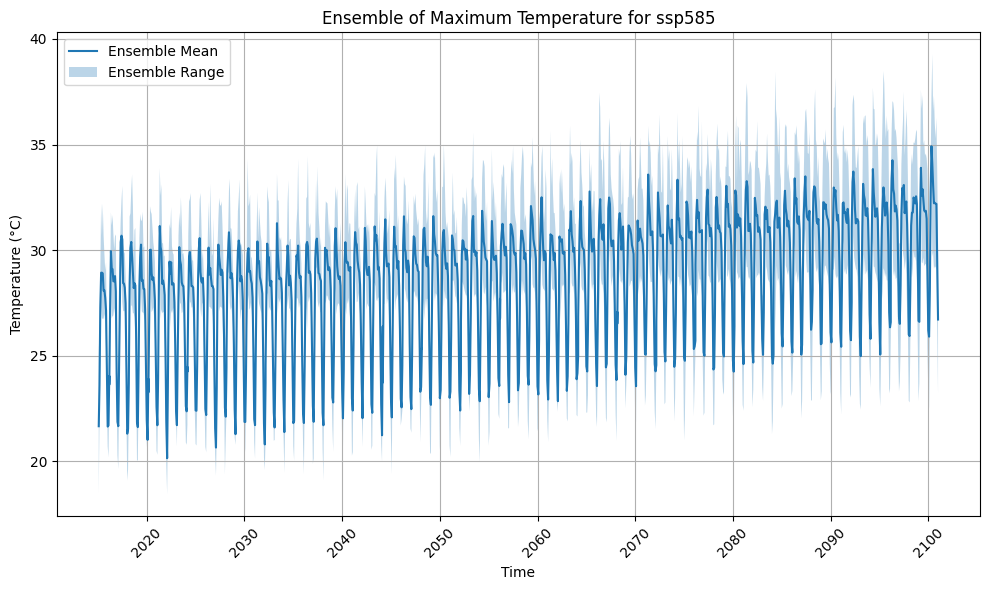

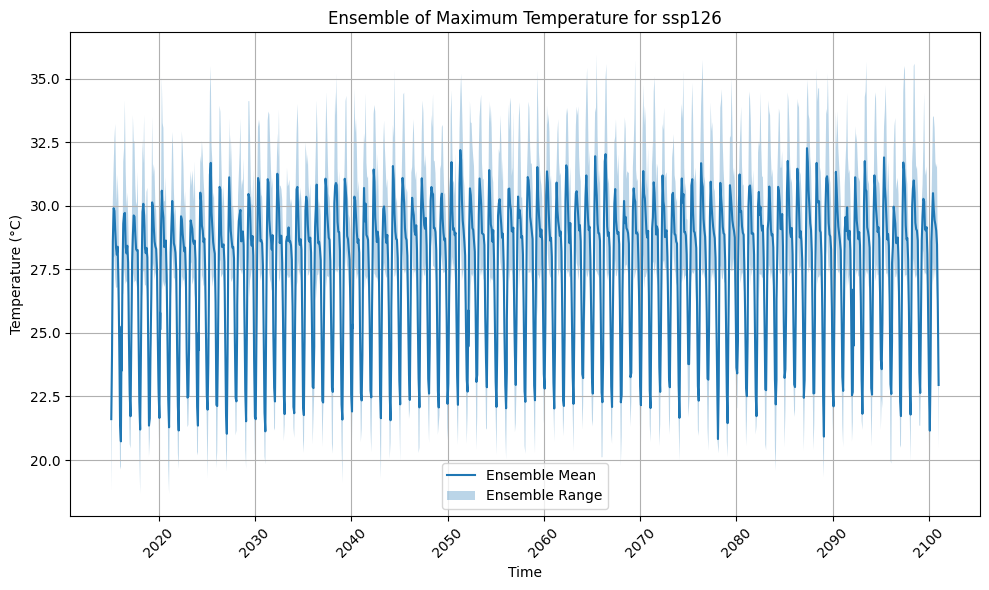

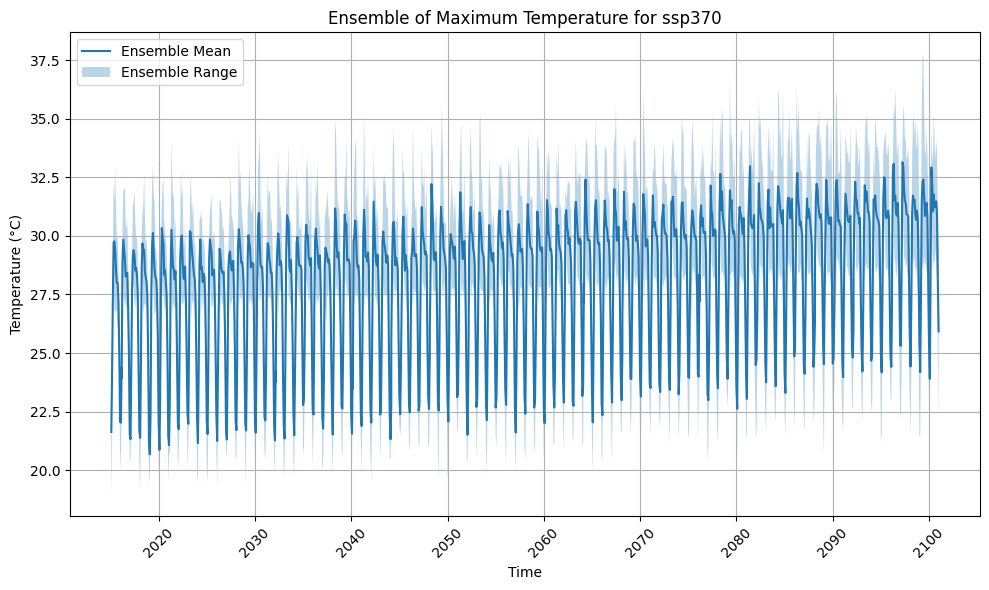

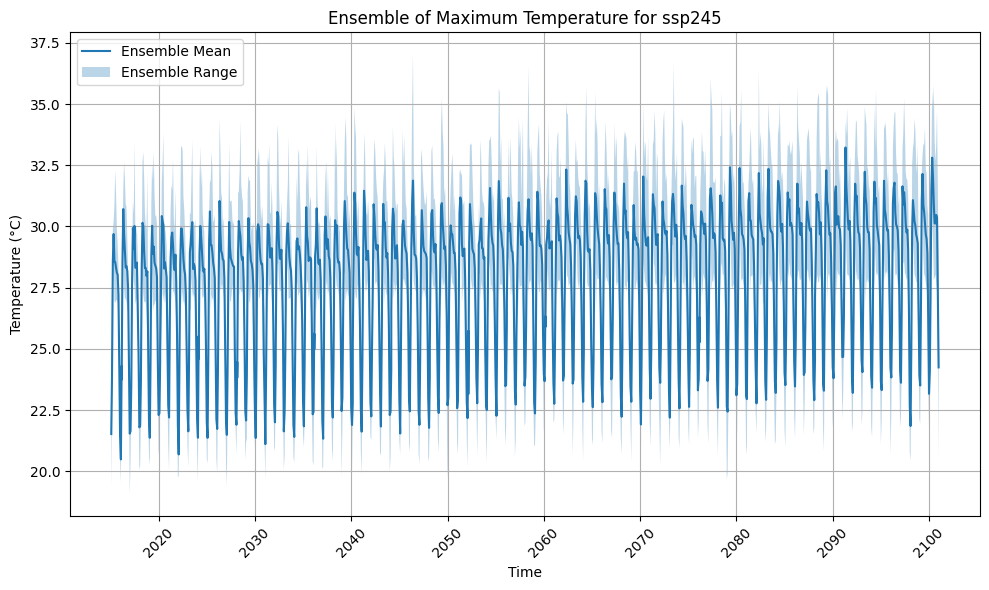

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

# Loop through each experiment and plot the ensemble mean
for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_temperatures.xlsx")

    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)  # Read with the first column as index

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(df_ensemble.index, df_ensemble['ensemble_mean'], label='Ensemble Mean')
        plt.fill_between(df_ensemble.index, df_ensemble['ensemble_min'], df_ensemble['ensemble_max'], alpha=0.3, label='Ensemble Range')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°C)')
        plt.title(f'Ensemble of Maximum Temperature for {experiment_id}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent labels from overlapping
        plt.show()
    else:
        print(f"File not found: {file_path}")


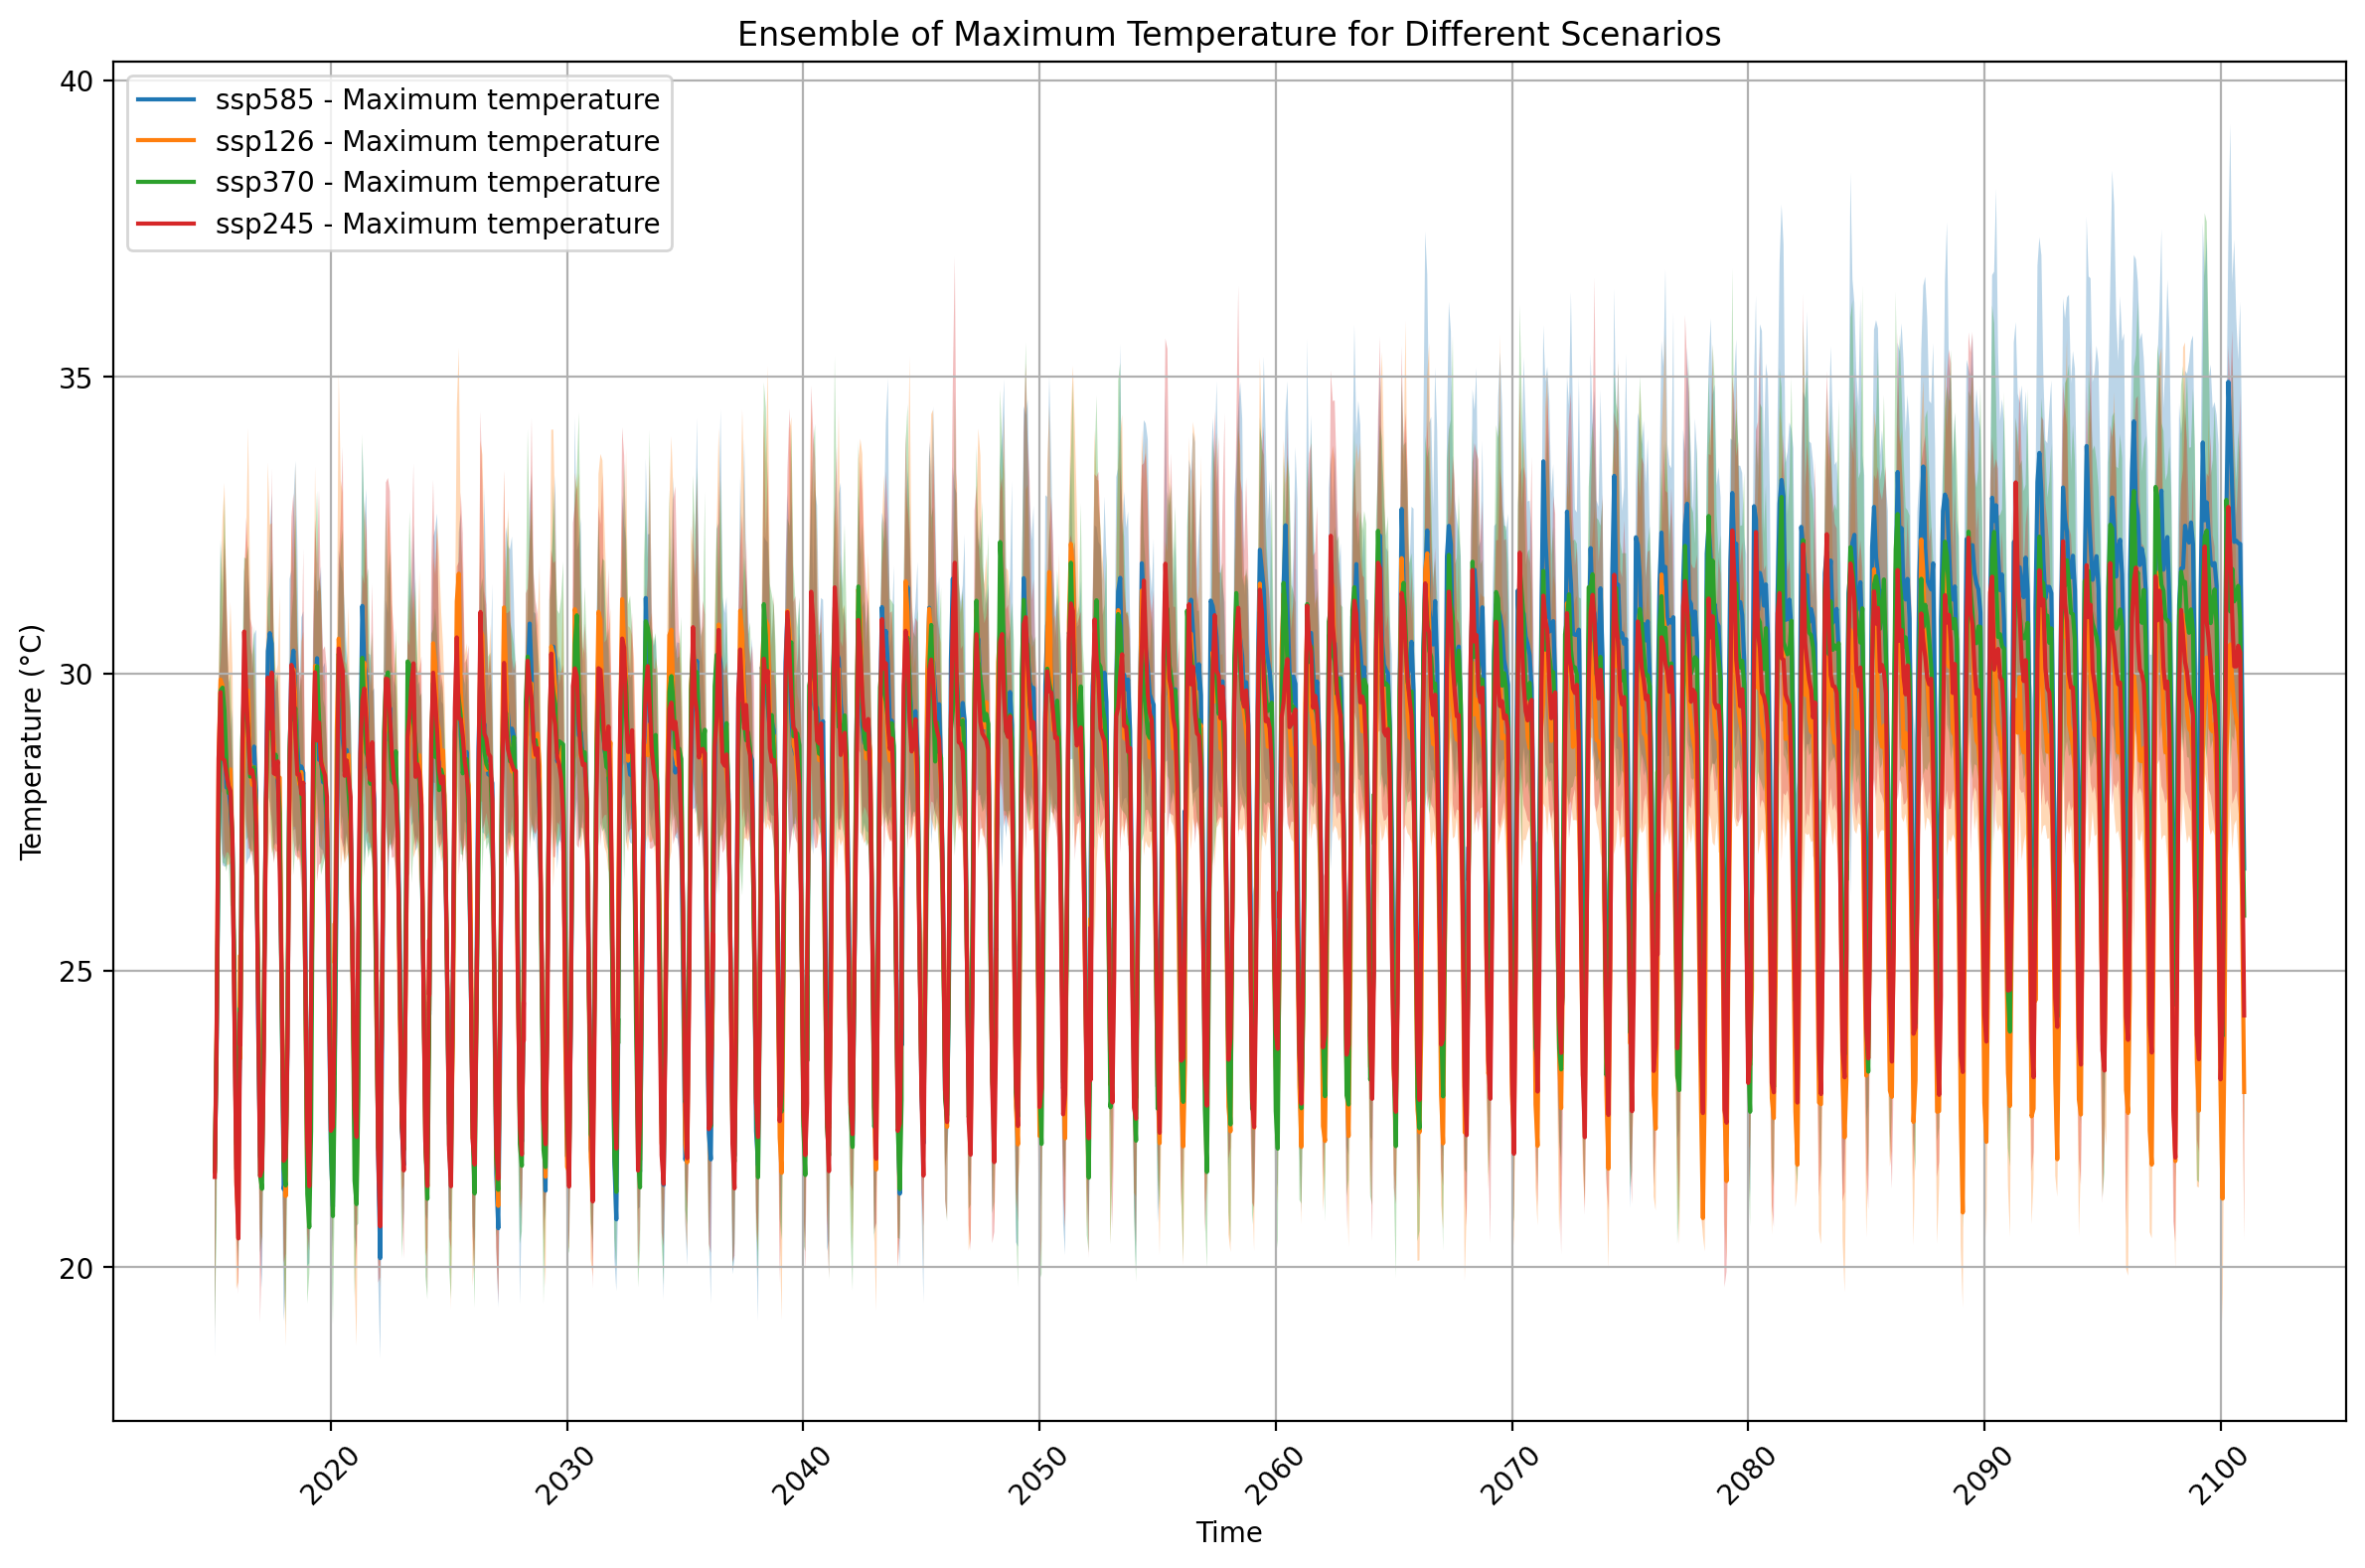

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/tasmax"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

# Create a single figure and axes
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
ax = plt.gca()  # Get current axes

# Loop through each experiment and plot on the same axes
for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_temperatures.xlsx")

    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)

        # Plotting on the same axes
        ax.plot(df_ensemble.index, df_ensemble['ensemble_mean'], label=f'{experiment_id} - Maximum temperature')
        ax.fill_between(df_ensemble.index, df_ensemble['ensemble_min'], df_ensemble['ensemble_max'], alpha=0.3)  # No need to label fill_between again

    else:
        print(f"File not found: {file_path}")

# Set plot labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Ensemble of Maximum Temperature for Different Scenarios')

# Add legend and grid
ax.legend()
ax.grid(True)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-14-9861e0f74664>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-14-9861e0f74664>:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()


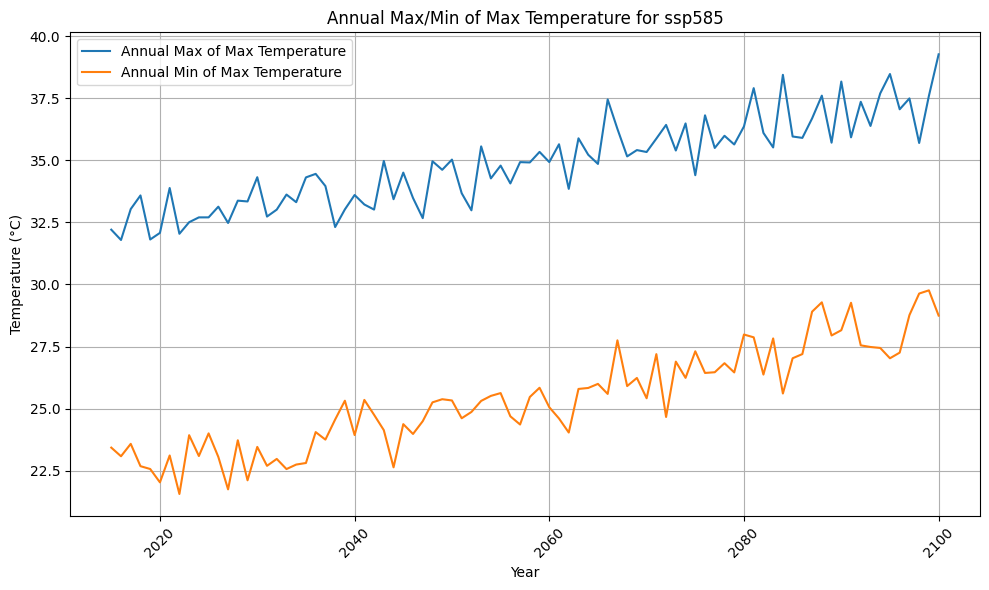

<ipython-input-14-9861e0f74664>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-14-9861e0f74664>:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()


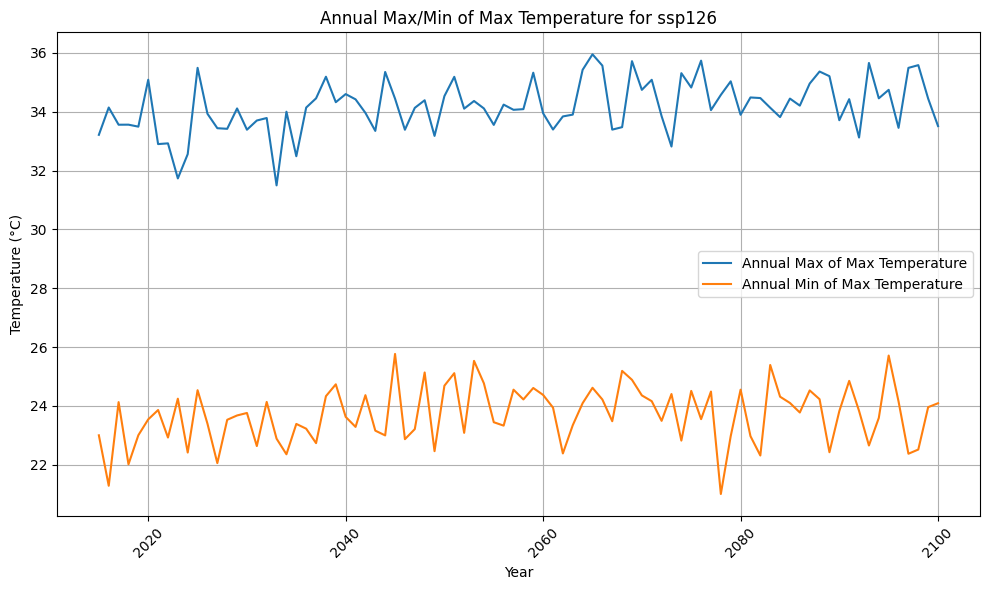

<ipython-input-14-9861e0f74664>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-14-9861e0f74664>:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()


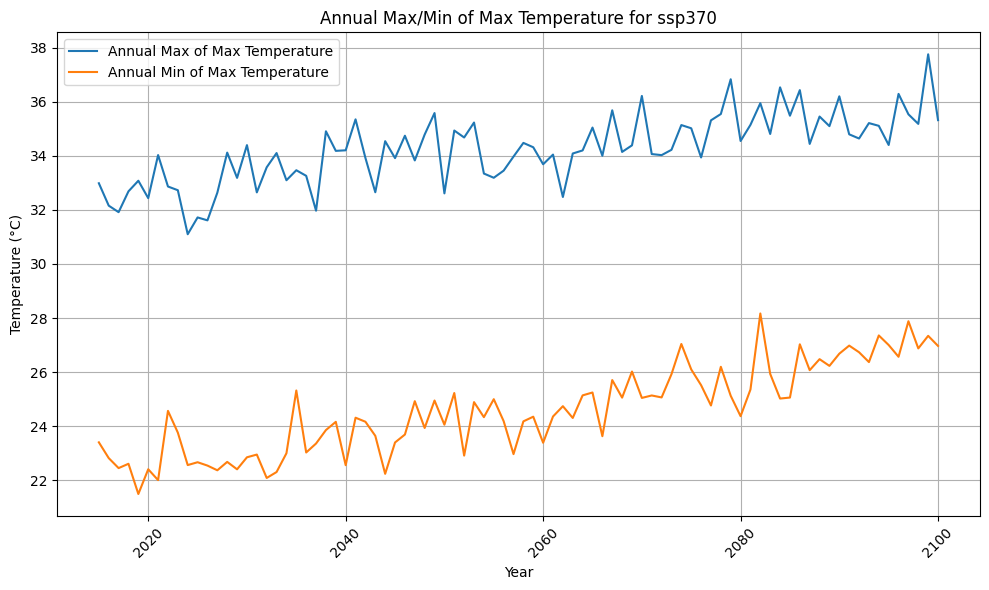

<ipython-input-14-9861e0f74664>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-14-9861e0f74664>:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()


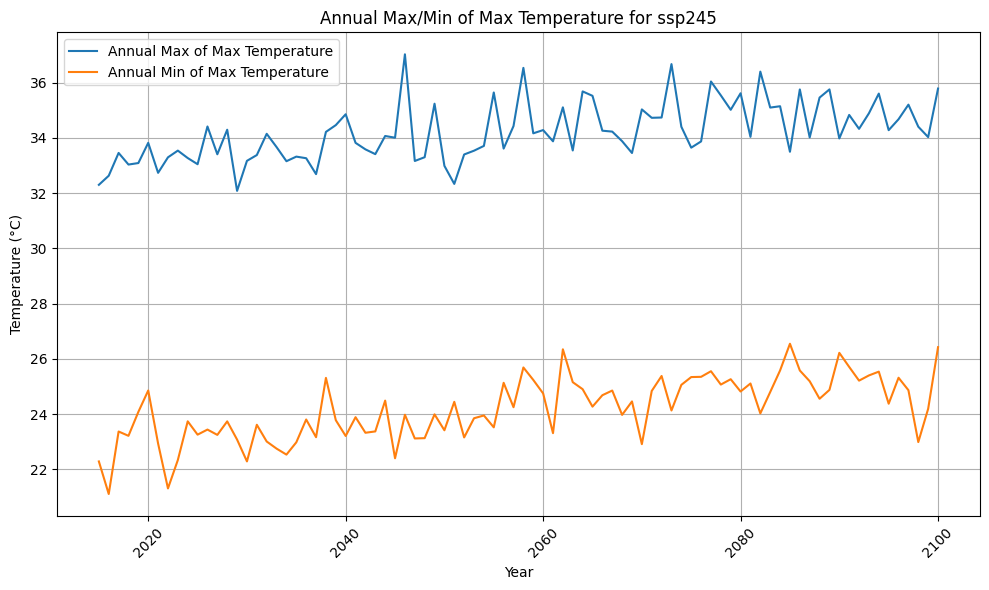

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_temperatures.xlsx")

    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)

        # Calculate annual maximum of the ensemble maximum and minimum of the ensemble maximum
        annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
        annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(annual_max_of_max.index.year, annual_max_of_max.values, label='Annual Max of Max Temperature')
        plt.plot(annual_min_of_max.index.year, annual_min_of_max.values, label='Annual Min of Max Temperature')

        plt.xlabel('Year')
        plt.ylabel('Temperature (°C)')
        plt.title(f'Annual Max/Min of Max Temperature for {experiment_id}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"File not found: {file_path}")


<ipython-input-23-9479ac275fee>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-23-9479ac275fee>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()
<ipython-input-23-9479ac275fee>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-23-9479ac275fee>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()
<ipython-input-23-9479ac275fee>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_m

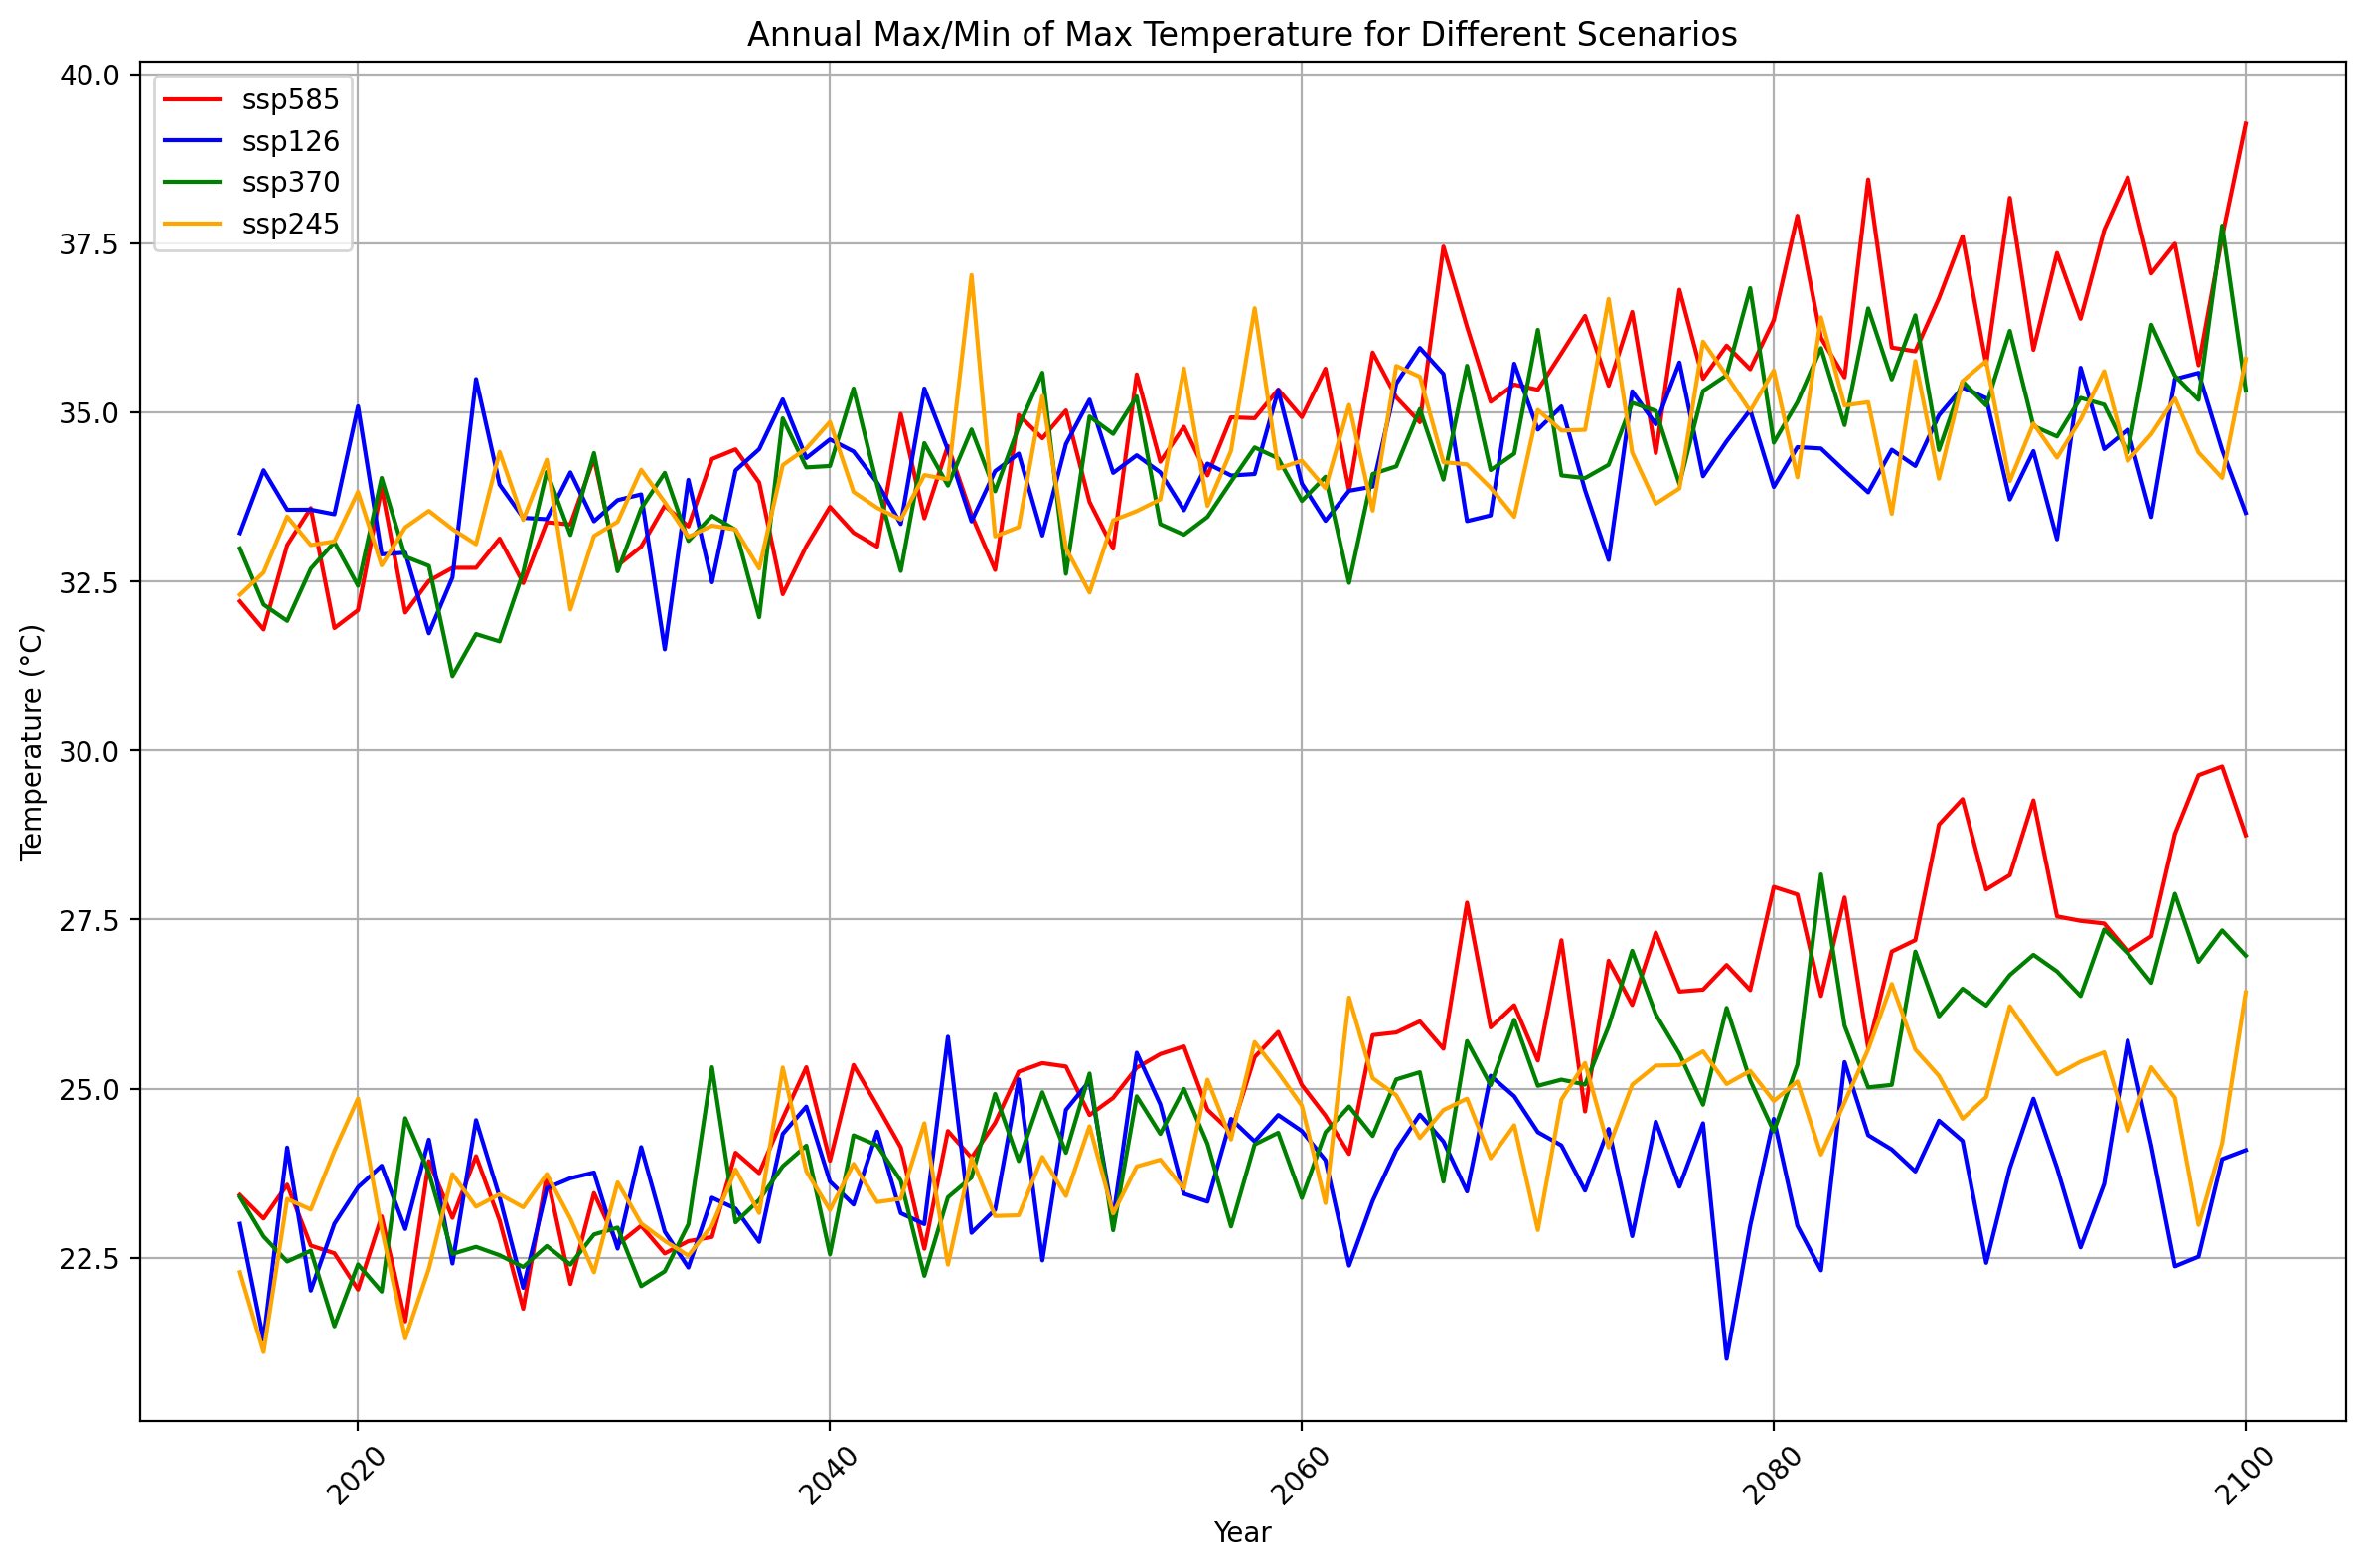

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/tasmax"

# Define the experiment IDs and corresponding colors
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']
colors = ['red', 'blue', 'green', 'orange']  # Assign colors to each experiment ID

# Create a single figure and axes
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Loop through each experiment and plot on the same axes
for experiment_id, color in zip(experiment_ids, colors):
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_temperatures.xlsx")

    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)

        # Calculate annual maximum of the ensemble maximum and minimum of the ensemble maximum
        annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
        annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()

        # Plotting on the same axes with specified color
        ax.plot(annual_max_of_max.index.year, annual_max_of_max.values, label=f'{experiment_id}', color=color)
        ax.plot(annual_min_of_max.index.year, annual_min_of_max.values, color=color)

    else:
        print(f"File not found: {file_path}")

# Set plot labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Annual Max/Min of Max Temperature for Different Scenarios')

# Add legend and grid
ax.legend()
ax.grid(True)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-14-009e8b80c089>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  summer_days = (df_ensemble['ensemble_max'] > 25).resample('Y').sum()


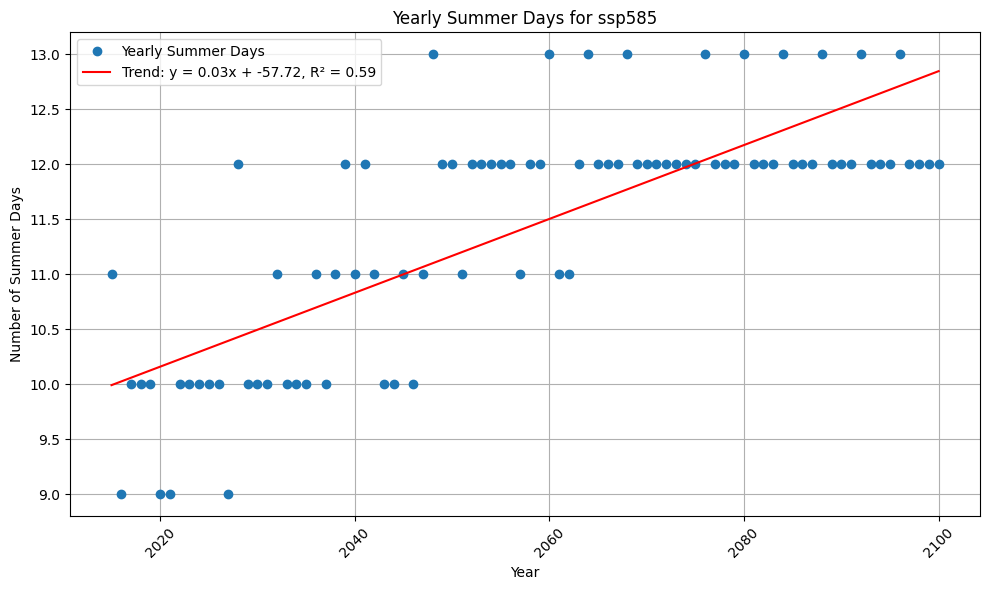

<ipython-input-14-009e8b80c089>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  summer_days = (df_ensemble['ensemble_max'] > 25).resample('Y').sum()


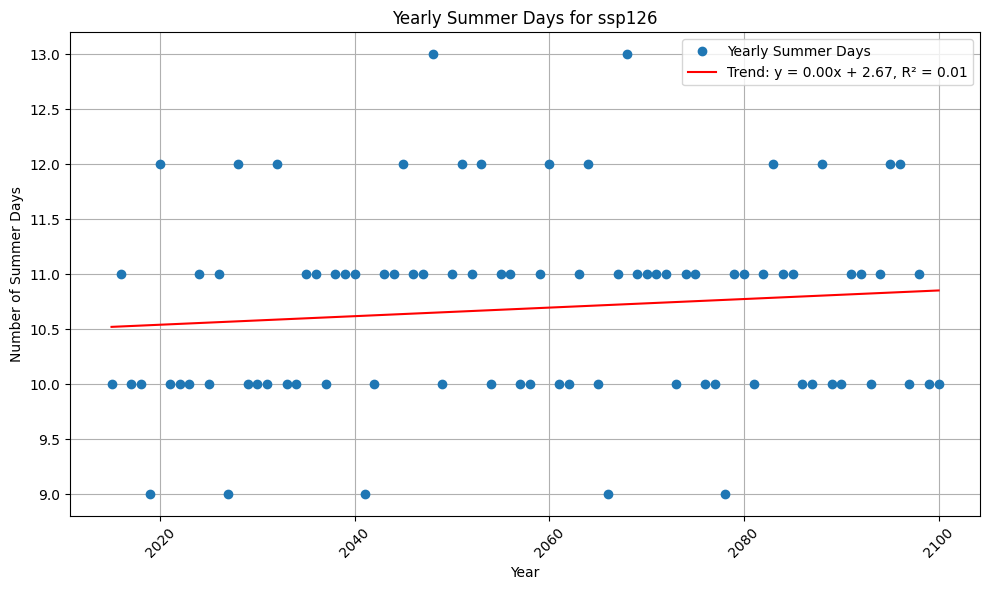

<ipython-input-14-009e8b80c089>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  summer_days = (df_ensemble['ensemble_max'] > 25).resample('Y').sum()


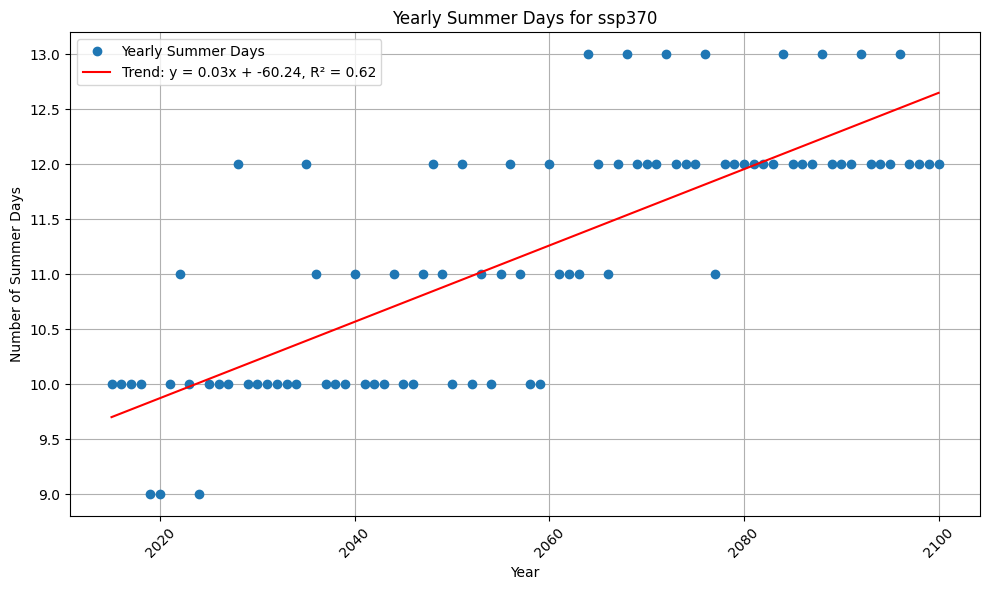

<ipython-input-14-009e8b80c089>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  summer_days = (df_ensemble['ensemble_max'] > 25).resample('Y').sum()


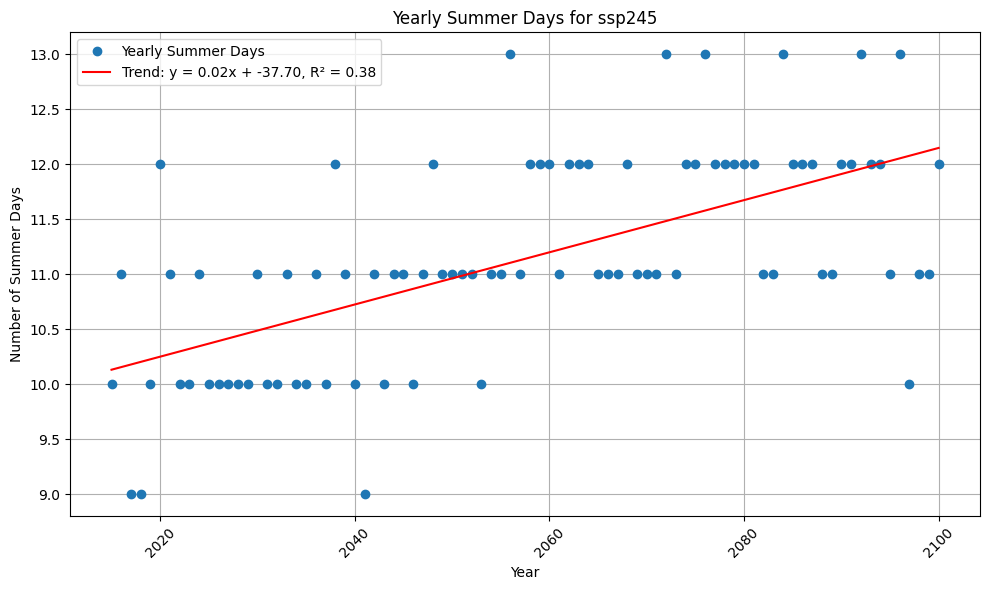

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats # Import stats module from scipy

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_temperatures.xlsx")

    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)
        df_ensemble.index = pd.to_datetime(df_ensemble.index)

        # Calculate yearly summer days (days with maximum temperature > 25°C)
        summer_days = (df_ensemble['ensemble_max'] > 25).resample('Y').sum()

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(summer_days.index.year, summer_days.values, 'o', label='Yearly Summer Days')  # Dot plot

        # Calculate trend line
        slope, intercept, r_value, p_value, std_err = stats.linregress(summer_days.index.year, summer_days.values)
        trend_line = slope * summer_days.index.year + intercept

        plt.plot(summer_days.index.year, trend_line, 'r-', label=f'Trend: y = {slope:.2f}x + {intercept:.2f}, R² = {r_value**2:.2f}')

        plt.xlabel('Year')
        plt.ylabel('Number of Summer Days')
        plt.title(f'Yearly Summer Days for {experiment_id}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"File not found: {file_path}")

<ipython-input-18-a8bfccc7651e>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  summer_days = (df_ensemble['ensemble_max'] > 20).resample('Y').sum()


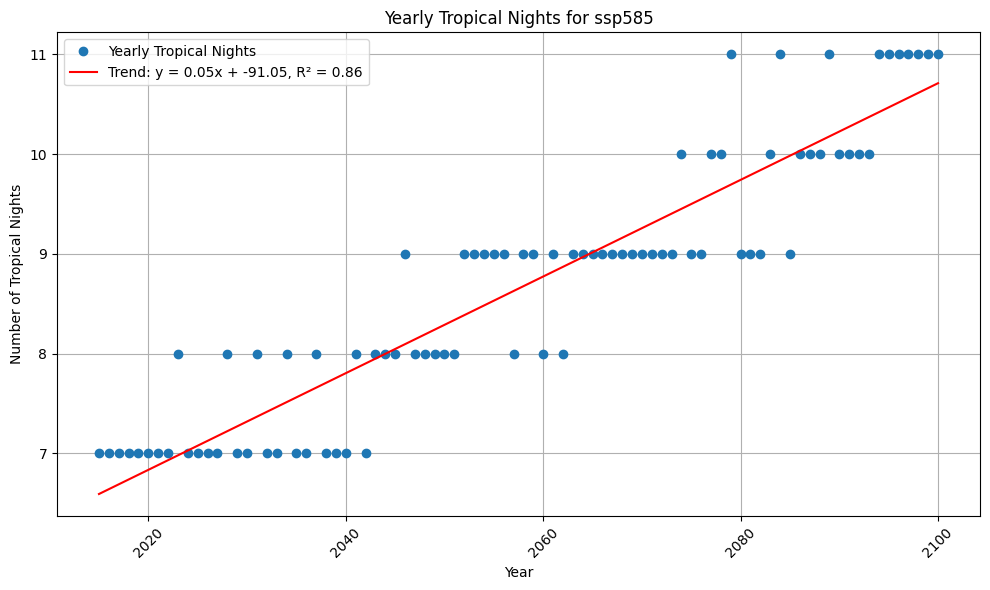

<ipython-input-18-a8bfccc7651e>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  summer_days = (df_ensemble['ensemble_max'] > 20).resample('Y').sum()


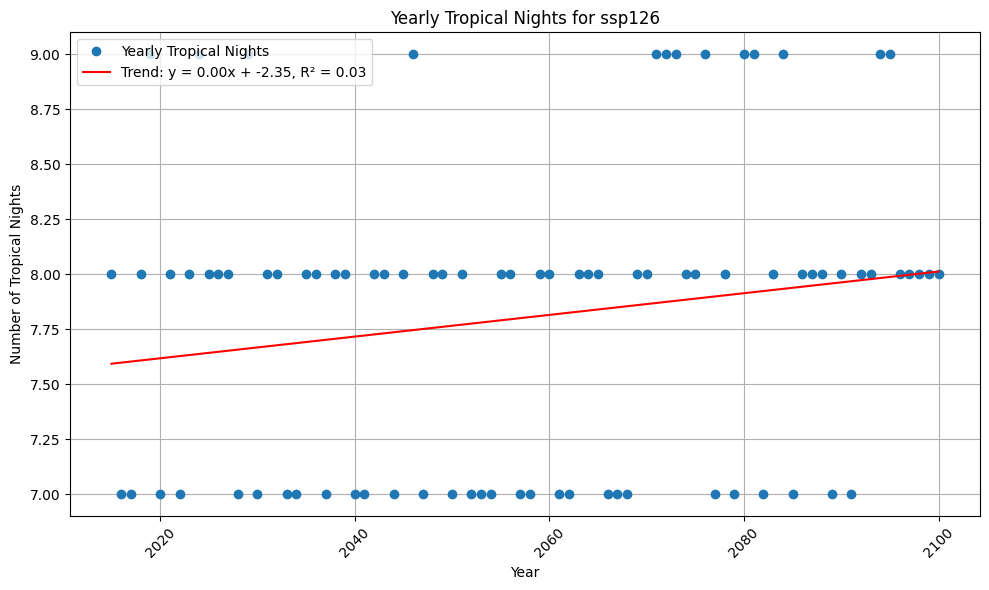

<ipython-input-18-a8bfccc7651e>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  summer_days = (df_ensemble['ensemble_max'] > 20).resample('Y').sum()


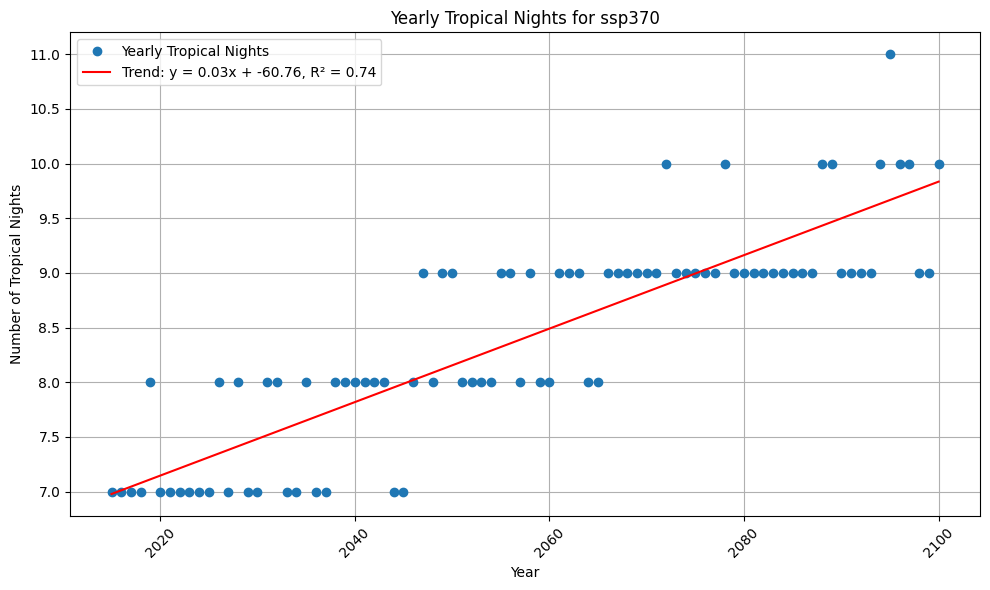

<ipython-input-18-a8bfccc7651e>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  summer_days = (df_ensemble['ensemble_max'] > 20).resample('Y').sum()


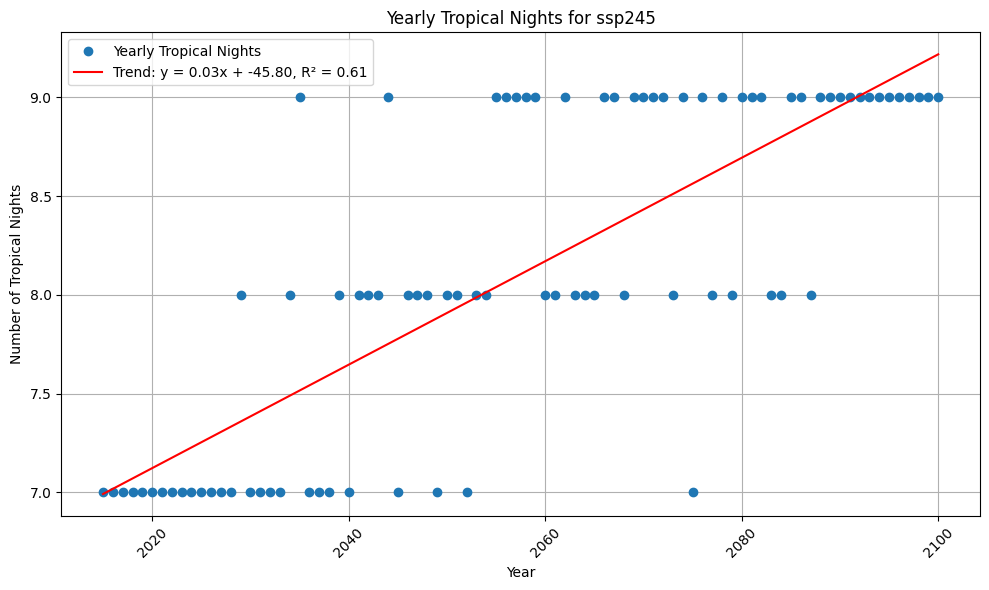

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats # Import stats module from scipy

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/tasmin"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean of min_temperatures.xlsx")

    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)
        df_ensemble.index = pd.to_datetime(df_ensemble.index)

        # Calculate yearly summer days (days with maximum temperature > 25°C)
        summer_days = (df_ensemble['ensemble_max'] > 20).resample('Y').sum()

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(summer_days.index.year, summer_days.values, 'o', label='Yearly Tropical Nights')  # Dot plot

        # Calculate trend line
        slope, intercept, r_value, p_value, std_err = stats.linregress(summer_days.index.year, summer_days.values)
        trend_line = slope * summer_days.index.year + intercept

        plt.plot(summer_days.index.year, trend_line, 'r-', label=f'Trend: y = {slope:.2f}x + {intercept:.2f}, R² = {r_value**2:.2f}')

        plt.xlabel('Year')
        plt.ylabel('Number of Tropical Nights')
        plt.title(f'Yearly Tropical Nights for {experiment_id}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"File not found: {file_path}")

<ipython-input-20-6dedac0fcfd0>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-20-6dedac0fcfd0>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-20-6dedac0fcfd0>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-20-6dedac0fcfd0>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()


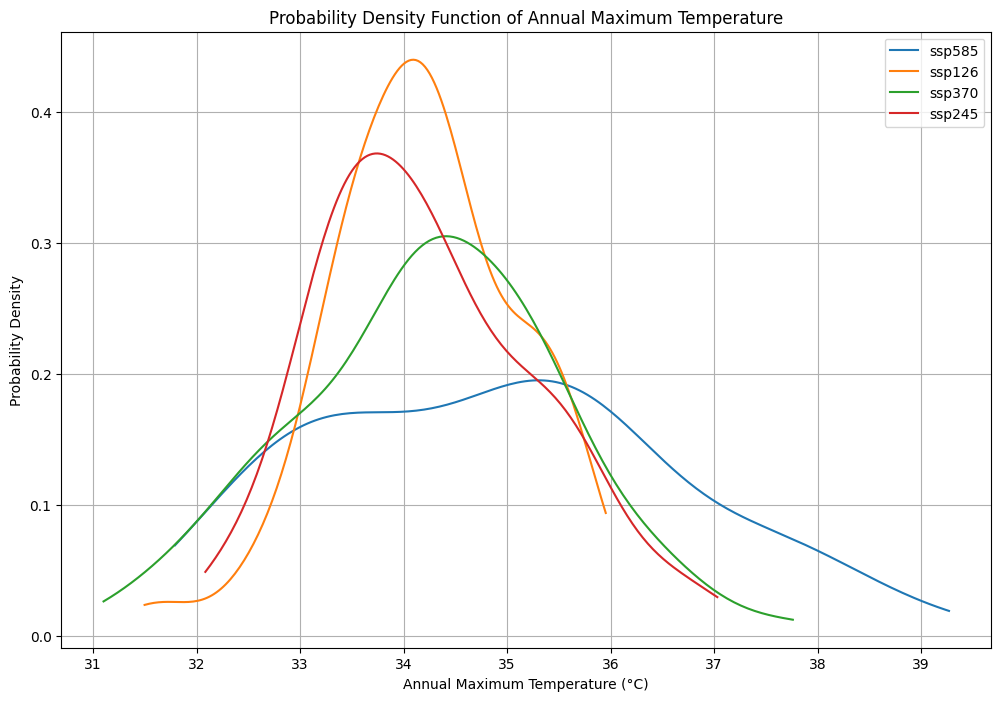

In [ ]:
# prompt: Probability density function of Maximum temperature in different scenarios in a single plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

# Create the plot
plt.figure(figsize=(12, 8))

for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_temperatures.xlsx")
    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)
        df_ensemble.index = pd.to_datetime(df_ensemble.index)

        # Calculate annual maximum temperature
        annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()

        # Fit a kernel density estimate (KDE)
        density = stats.gaussian_kde(annual_max_temp)
        x_values = np.linspace(annual_max_temp.min(), annual_max_temp.max(), 200)
        y_values = density(x_values)

        # Plot the KDE
        plt.plot(x_values, y_values, label=experiment_id)

plt.xlabel('Annual Maximum Temperature (°C)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Annual Maximum Temperature')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-23-ee95c4e77194>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-23-ee95c4e77194>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-23-ee95c4e77194>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-23-ee95c4e77194>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()


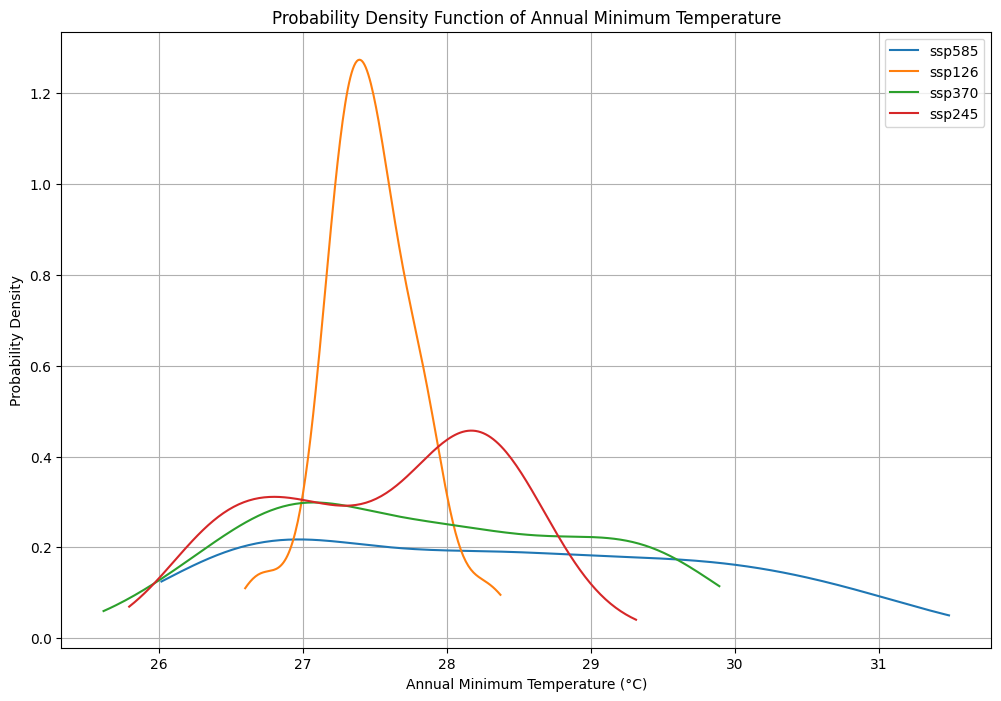

In [ ]:
# prompt: Probability density function of Maximum temperature in different scenarios in a single plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/tasmin"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

# Create the plot
plt.figure(figsize=(12, 8))

for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean of min_temperatures.xlsx")
    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)
        df_ensemble.index = pd.to_datetime(df_ensemble.index)

        # Calculate annual maximum temperature
        annual_max_temp = df_ensemble['ensemble_max'].resample('Y').max()

        # Fit a kernel density estimate (KDE)
        density = stats.gaussian_kde(annual_max_temp)
        x_values = np.linspace(annual_max_temp.min(), annual_max_temp.max(), 200)
        y_values = density(x_values)

        # Plot the KDE
        plt.plot(x_values, y_values, label=experiment_id)

plt.xlabel('Annual Minimum Temperature (°C)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Annual Minimum Temperature')
plt.legend()
plt.grid(True)
plt.show()


# TASMIN


In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import gcsfs  # Required for Google Cloud Storage

# Define the latitude and longitude range for Bangladesh
lat_range = slice(20.5, 27)
lon_range = slice(88, 93)

# Initialize GCS file system
gcs = gcsfs.GCSFileSystem(token="anon")  # Anonymous access to CMIP6

def download_and_save_data(df_ta, experiment_id, source_id):
    # Filter the DataFrame for the given experiment_id and source_id
    df_ta_filtered = df_ta.query(f"member_id == 'r1i1p1f1' & source_id == '{source_id}' & experiment_id == '{experiment_id}'")

    # Create an empty list to store results
    temperature_data = []

    # Iterate over each row in df_ta_filtered
    for _, row in df_ta_filtered.iterrows():
        zstore = row['zstore']

        try:
            # Open dataset from Google Cloud Storage using gcsfs
            ds = xr.open_zarr(f"gcs://{zstore}", storage_options={"token": "anon"}, consolidated=True)

            # Select temperature variable (assuming it's 'tas' or 'ta')
            temp_var = 'tasmin' if 'tasmin' in ds else 'ta'
            ds_temp = ds[temp_var]

            # Select Bangladesh region
            ds_temp = ds_temp.sel(lat=lat_range, lon=lon_range)

            # Convert Kelvin to Celsius if needed
            if ds_temp.attrs.get('units', '') == 'K':
                ds_temp = ds_temp - 273.15

            # Compute area-weighted average
            weights = np.cos(np.deg2rad(ds_temp.lat))
            ds_weighted = ds_temp.weighted(weights)

            # Compute monthly mean
            ds_monthly_avg = ds_weighted.mean(dim=['lat', 'lon']).resample(time='1M').mean()

            # Convert to DataFrame and store results
            df_temp = ds_monthly_avg.to_dataframe().reset_index()
            df_temp['source_id'] = source_id
            temperature_data.append(df_temp)

        except Exception as e:
            print(f"Error processing {zstore}: {e}")

    # Ensure the list is not empty before concatenation
    if temperature_data:
        df_monthly_temperature = pd.concat(temperature_data, ignore_index=True)

        # Save the DataFrame to an Excel file
        output_file = f"/content/drive/MyDrive/CCRM TP/tasmin/{experiment_id}_{source_id}_monthly_temperatures.xlsx"
        try:
            with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
                df_monthly_temperature.to_excel(writer, sheet_name='Monthly Temperatures', index=False)
            print(f"DataFrame successfully saved to {output_file}")
        except Exception as e:
            print(f"An error occurred while saving {output_file}: {e}")
    else:
        print(f"No valid data was extracted for {experiment_id} and {source_id}.")

# Define the combinations of experiment_id and source_id to process
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']
source_ids = ['INM-CM4-8', 'INM-CM5-0', 'ACCESS-CM2', 'IPSL-CM6A-LR']

# Loop through each combination and process the data
for experiment_id in experiment_ids:
    for source_id in source_ids:
        download_and_save_data(df_ta, experiment_id, source_id)

<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp585_INM-CM4-8_monthly_temperatures.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp585_INM-CM5-0_monthly_temperatures.xlsx


/usr/local/lib/python3.11/dist-packages/xarray/coding/times.py:1133: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.11/dist-packages/xarray/coding/times.py:1133: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.11/dist-packages/xarray/core/indexing.py:511: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)
<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'M

DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp585_ACCESS-CM2_monthly_temperatures.xlsx


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp585_IPSL-CM6A-LR_monthly_temperatures.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp126_INM-CM4-8_monthly_temperatures.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp126_INM-CM5-0_monthly_temperatures.xlsx


/usr/local/lib/python3.11/dist-packages/xarray/coding/times.py:1133: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.11/dist-packages/xarray/coding/times.py:1133: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.11/dist-packages/xarray/core/indexing.py:511: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)
<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'M

DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp126_ACCESS-CM2_monthly_temperatures.xlsx


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp126_IPSL-CM6A-LR_monthly_temperatures.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp370_INM-CM4-8_monthly_temperatures.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp370_INM-CM5-0_monthly_temperatures.xlsx


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp370_ACCESS-CM2_monthly_temperatures.xlsx


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp370_IPSL-CM6A-LR_monthly_temperatures.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp245_INM-CM4-8_monthly_temperatures.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp245_INM-CM5-0_monthly_temperatures.xlsx


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp245_ACCESS-CM2_monthly_temperatures.xlsx


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp245_IPSL-CM6A-LR_monthly_temperatures.xlsx


In [ ]:
pip install cftime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.2 MB/s eta 0:00:00


In [ ]:
pip install cftime
import pandas as pd
import numpy as np
import os
import cftime
# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/tasmin/"

# Define the experiment IDs and source IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']
source_ids = ['INM-CM4-8', 'INM-CM5-0', 'ACCESS-CM2', 'IPSL-CM6A-LR']

# Create an empty dictionary to store dataframes for each experiment
ensemble_data = {exp: [] for exp in experiment_ids}

# Load data for each experiment and source
for experiment_id in experiment_ids:
    for source_id in source_ids:
        file_path = os.path.join(data_dir, f"{experiment_id}_{source_id}_monthly_temperatures.xlsx")

        if os.path.exists(file_path):
            df = pd.read_excel(file_path)

            # Explicitly select time and temperature columns
            time_col = df.columns[0]  # First column (time)
            temp_col = df.columns[2]  # Third column (tasmax)

            # Ensure 'time' is in datetime format
            df[time_col] = pd.to_datetime(df[time_col])

            # Set 'time' as the index
            df.set_index(time_col, inplace=True)

            # Convert temperature column to numeric, coercing errors to NaN
            df[temp_col] = pd.to_numeric(df[temp_col], errors='coerce')

            # Drop rows with NaN values (optional, depending on your use case)
            df.dropna(inplace=True)

            # Append the cleaned dataframe to the list
            ensemble_data[experiment_id].append(df[temp_col])  # Only append the temperature column
        else:
            print(f"File not found: {file_path}")

# Function to calculate the ensemble mean
def calculate_ensemble_mean(dataframes):
    # Concatenate all dataframes along the columns
    combined = pd.concat(dataframes, axis=1)

    # Calculate the mean across all models for each time step
    ensemble_mean = combined.mean(axis=1)

    # Calculate ensemble statistics (optional)
    ensemble_std = combined.std(axis=1)  # Standard deviation
    ensemble_min = combined.min(axis=1)  # Minimum
    ensemble_max = combined.max(axis=1)  # Maximum

    # Return as a DataFrame
    return pd.DataFrame({
        'ensemble_mean': ensemble_mean,
        'ensemble_std': ensemble_std,
        'ensemble_min': ensemble_min,
        'ensemble_max': ensemble_max
    })

# Calculate ensemble mean for each experiment
ensemble_results = {}
for experiment_id, dataframes in ensemble_data.items():
    if dataframes:  # Check if there are dataframes for this experiment
        ensemble_results[experiment_id] = calculate_ensemble_mean(dataframes)

# Save ensemble results to Excel files
for experiment_id, df_ensemble in ensemble_results.items():
    output_file = os.path.join(data_dir, f"{experiment_id}_ensemble_mean of min_temperatures.xlsx")
    df_ensemble.to_excel(output_file, index=True)
    print(f"Ensemble results for {experiment_id} saved to {output_file}")

Ensemble results for ssp585 saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp585_ensemble_mean of min_temperatures.xlsx
Ensemble results for ssp126 saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp126_ensemble_mean of min_temperatures.xlsx
Ensemble results for ssp370 saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp370_ensemble_mean of min_temperatures.xlsx
Ensemble results for ssp245 saved to /content/drive/MyDrive/CCRM TP/tasmin/ssp245_ensemble_mean of min_temperatures.xlsx


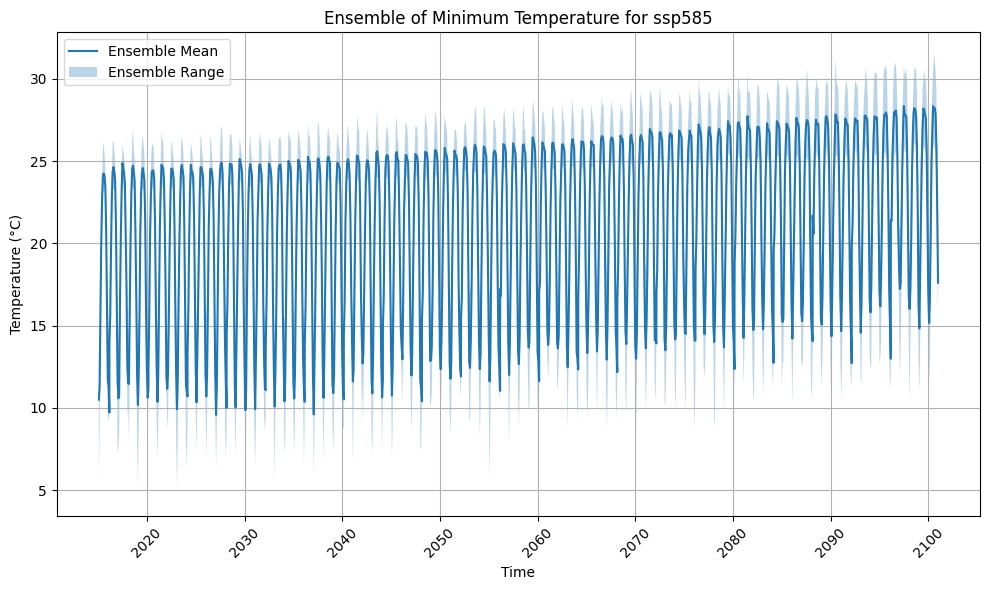

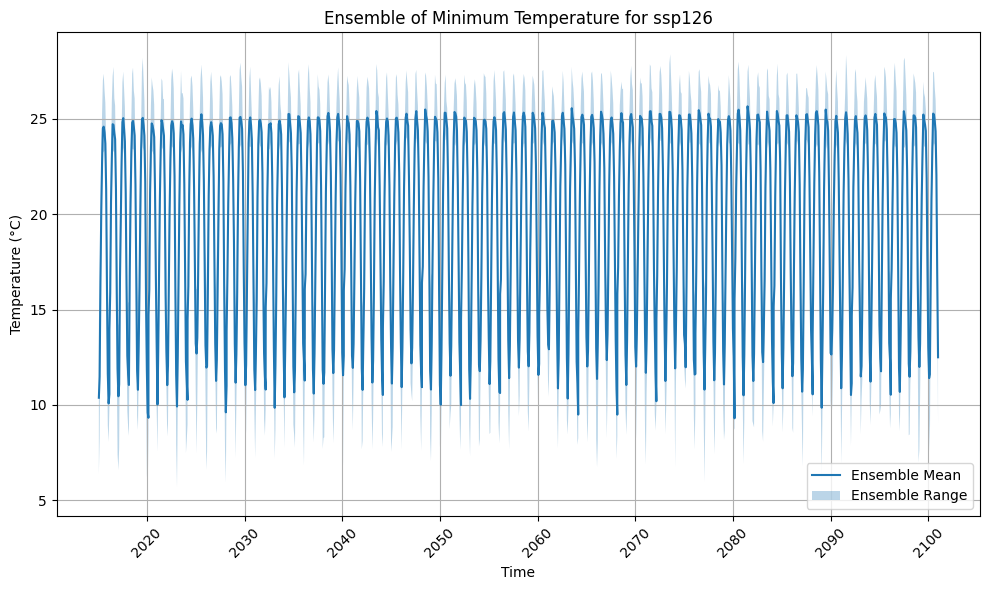

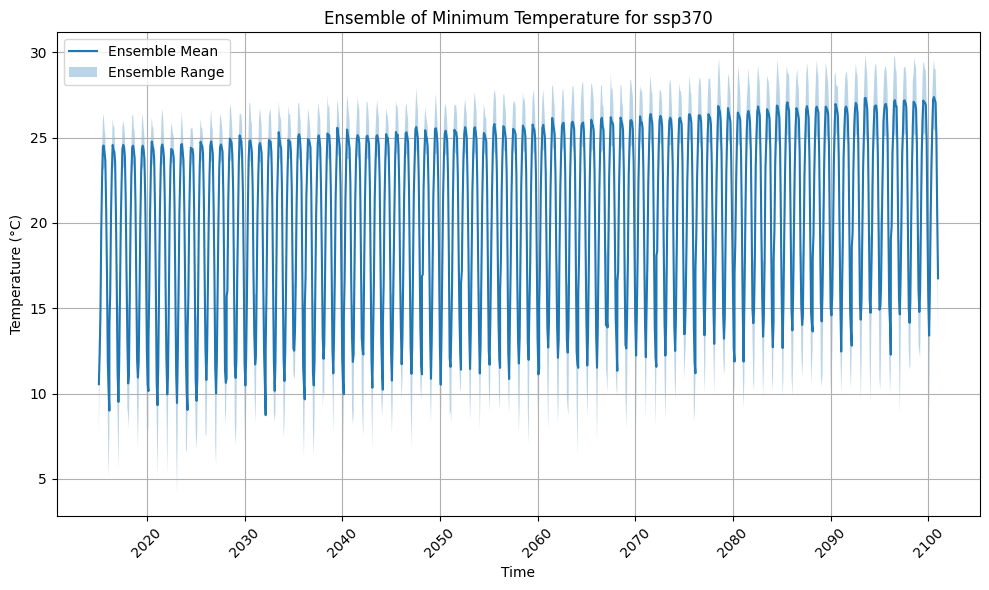

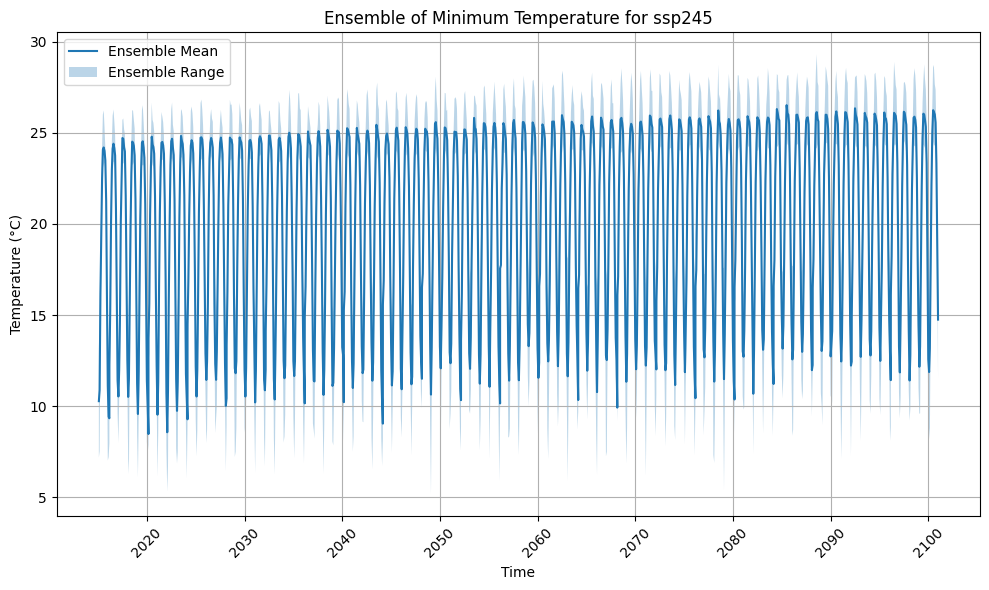

In [ ]:
# prompt: Visualize the ensemble results

import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/tasmin"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

# Loop through each experiment and plot the ensemble mean
for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean of min_temperatures.xlsx")

    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)  # Read with the first column as index

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(df_ensemble.index, df_ensemble['ensemble_mean'], label='Ensemble Mean')
        plt.fill_between(df_ensemble.index, df_ensemble['ensemble_min'], df_ensemble['ensemble_max'], alpha=0.3, label='Ensemble Range')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°C)')
        plt.title(f'Ensemble of Minimum Temperature for {experiment_id}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent labels from overlapping
        plt.show()
    else:
        print(f"File not found: {file_path}")


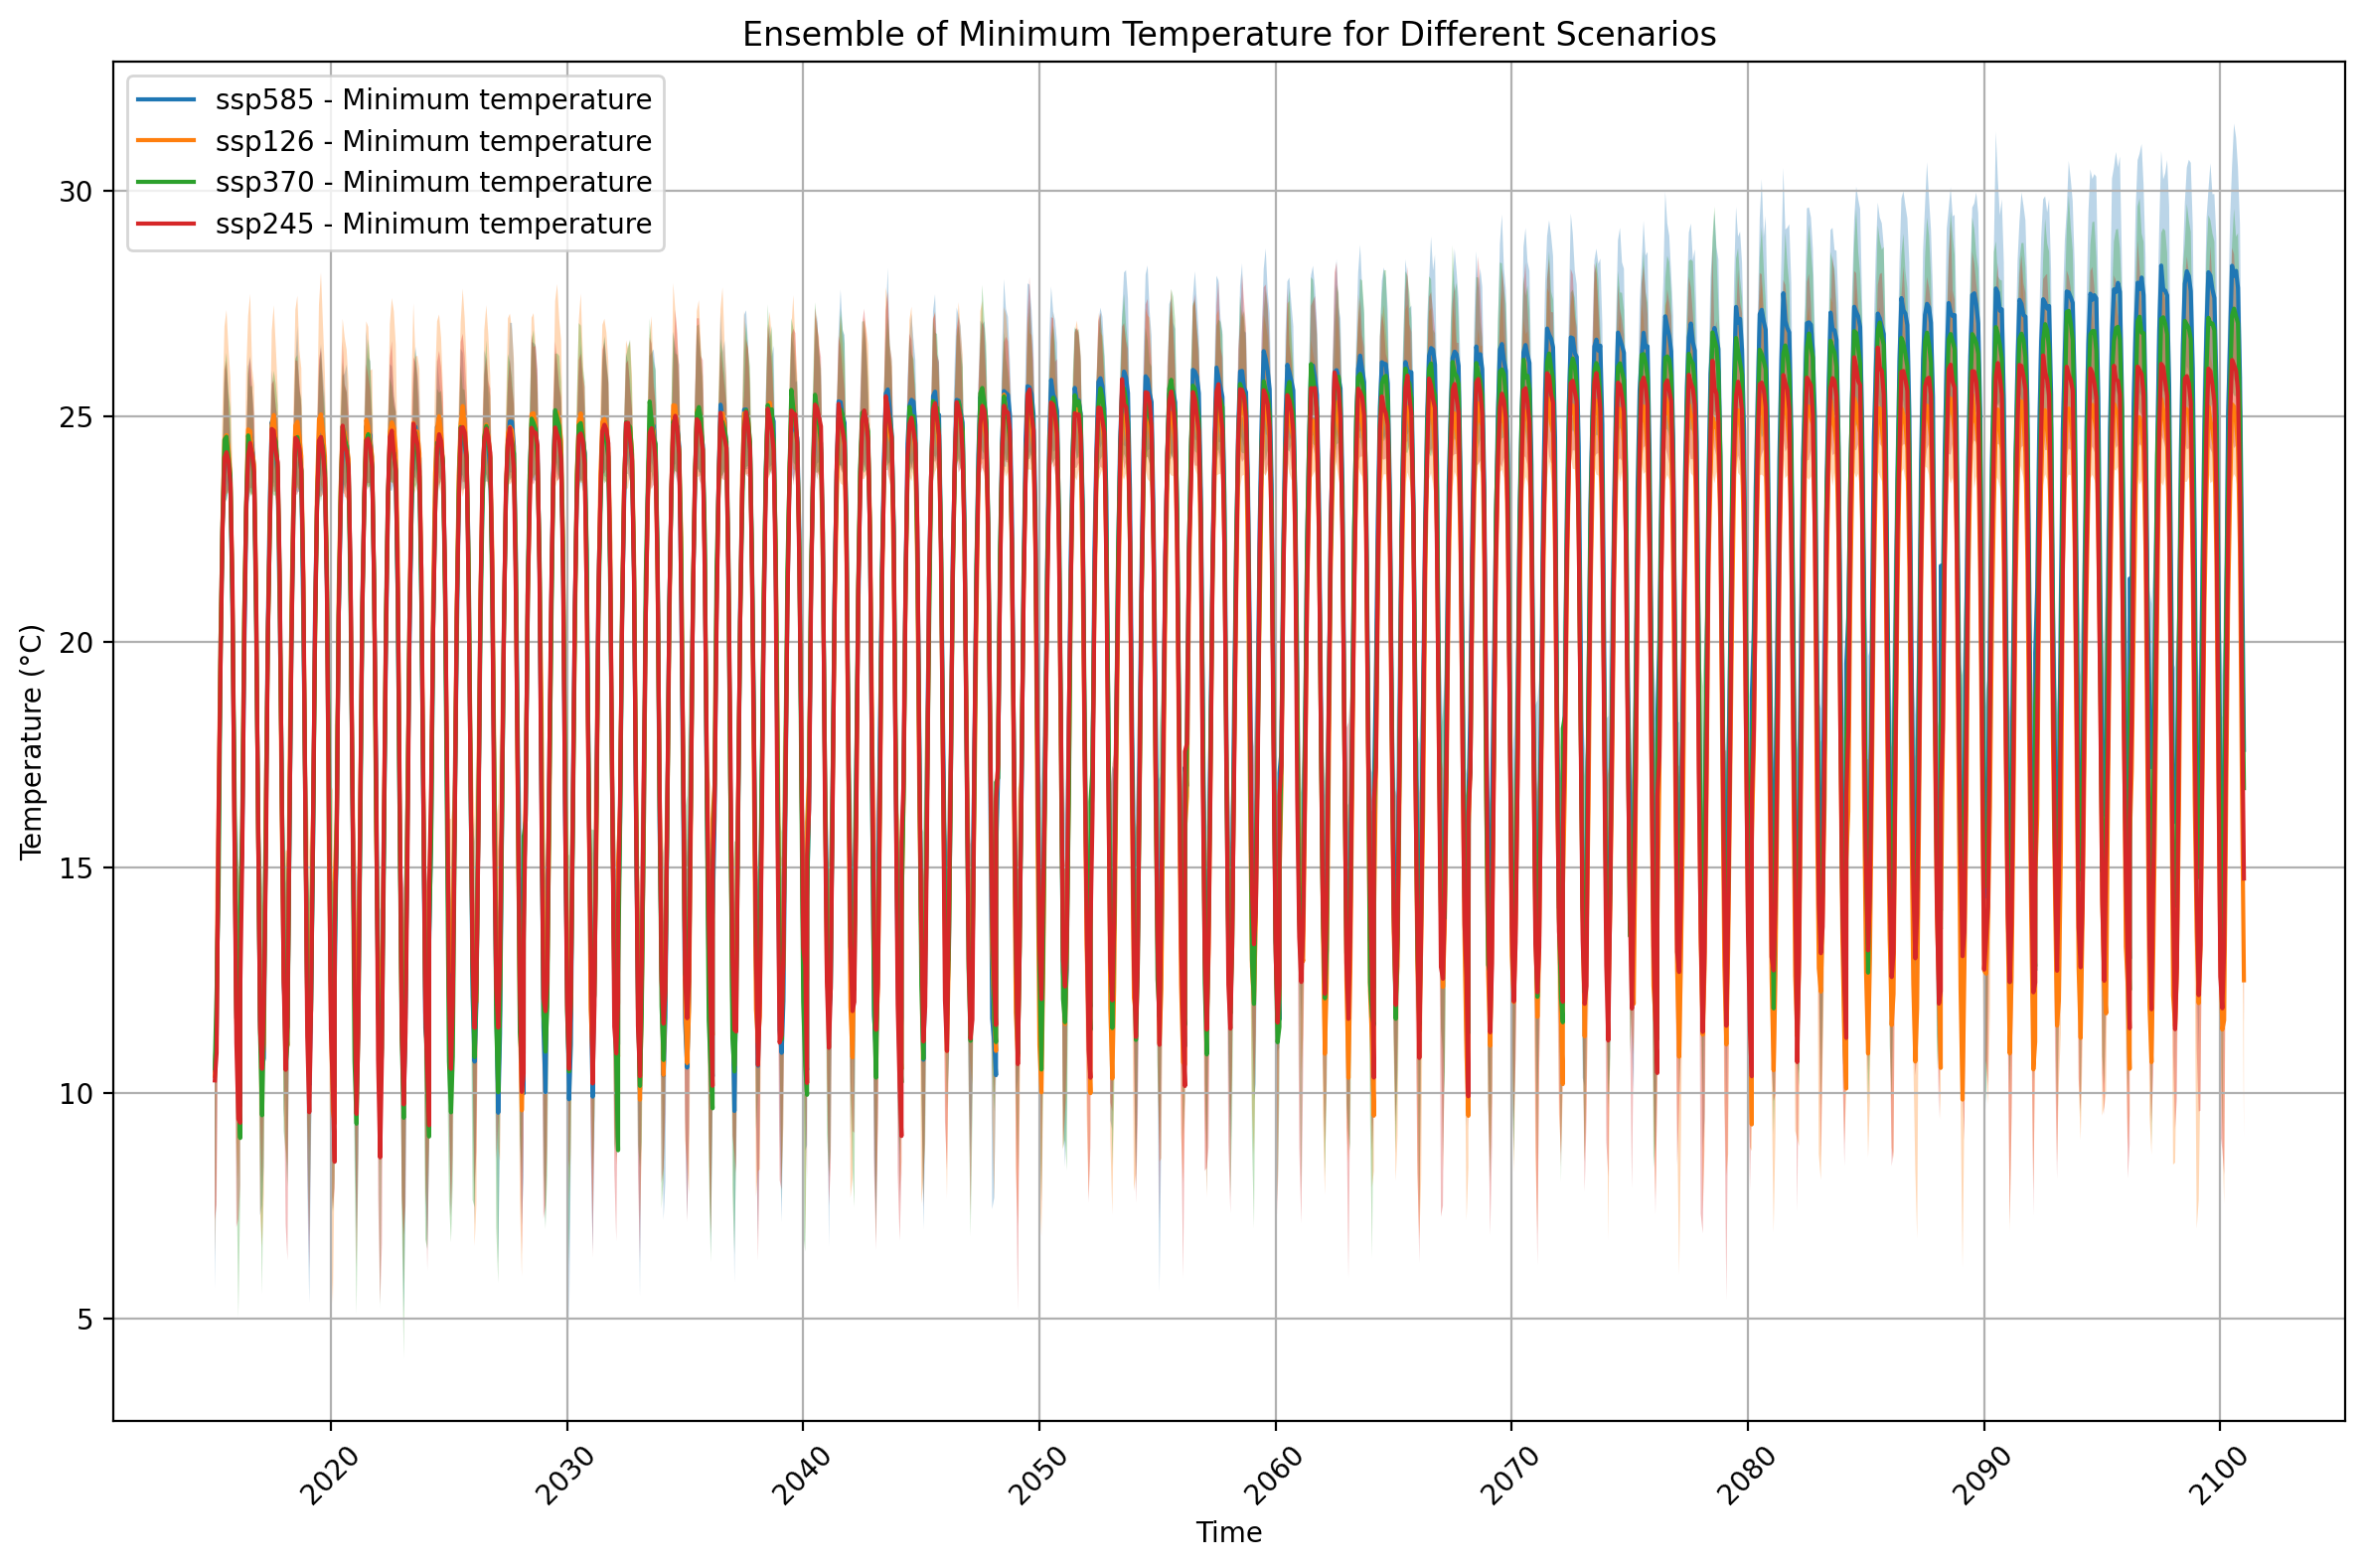

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/tasmin"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

# Create a single figure and axes
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
ax = plt.gca()  # Get current axes

# Loop through each experiment and plot on the same axes
for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean of min_temperatures.xlsx")

    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)

        # Plotting on the same axes
        ax.plot(df_ensemble.index, df_ensemble['ensemble_mean'], label=f'{experiment_id} - Minimum temperature')
        ax.fill_between(df_ensemble.index, df_ensemble['ensemble_min'], df_ensemble['ensemble_max'], alpha=0.3)  # No need to label fill_between again

    else:
        print(f"File not found: {file_path}")

# Set plot labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Ensemble of Minimum Temperature for Different Scenarios')

# Add legend and grid
ax.legend()
ax.grid(True)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-9-67bd6c74cefa>:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_data = df_ensemble.resample('A').agg({'ensemble_max': 'max', 'ensemble_min': 'min'})


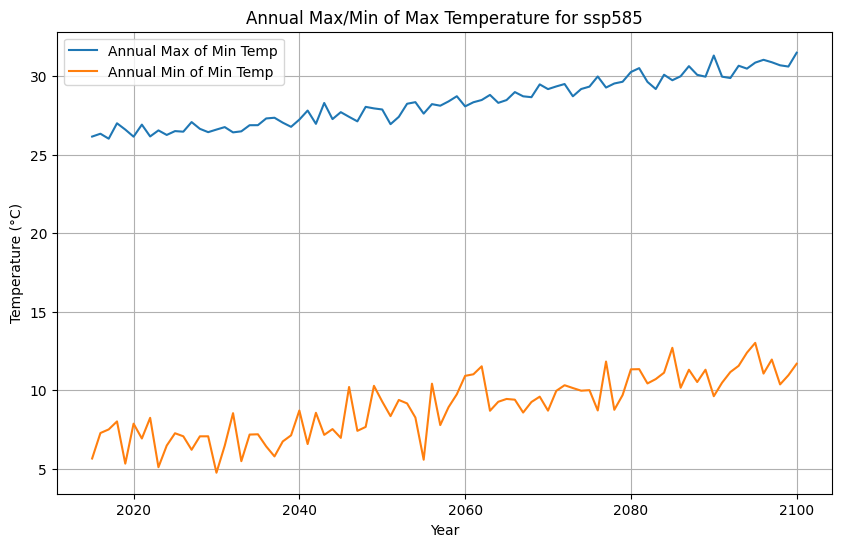

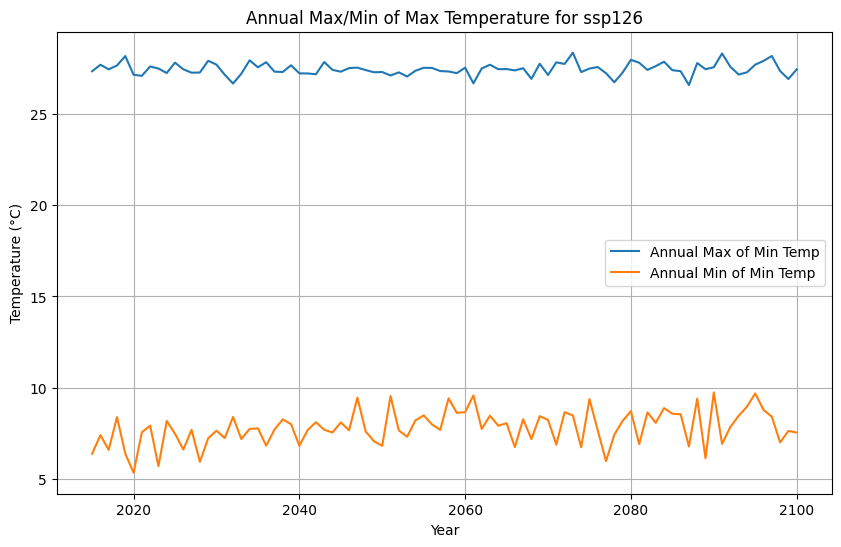

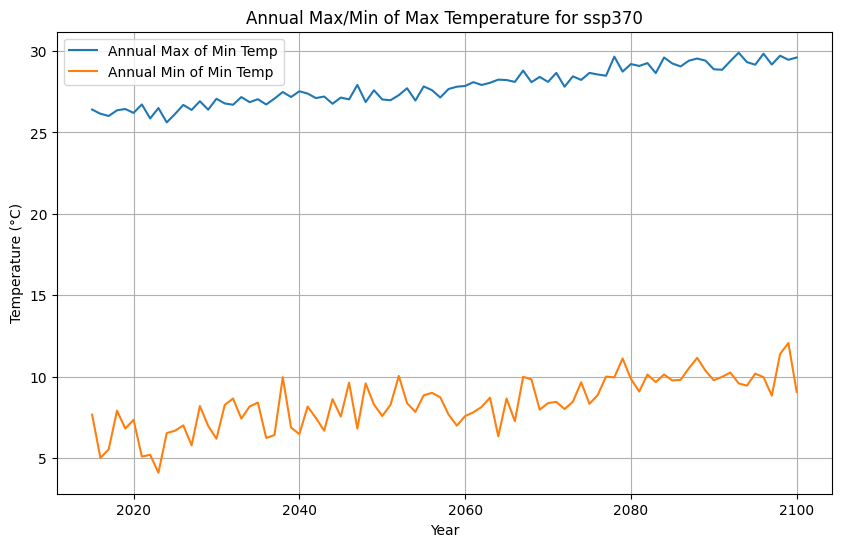

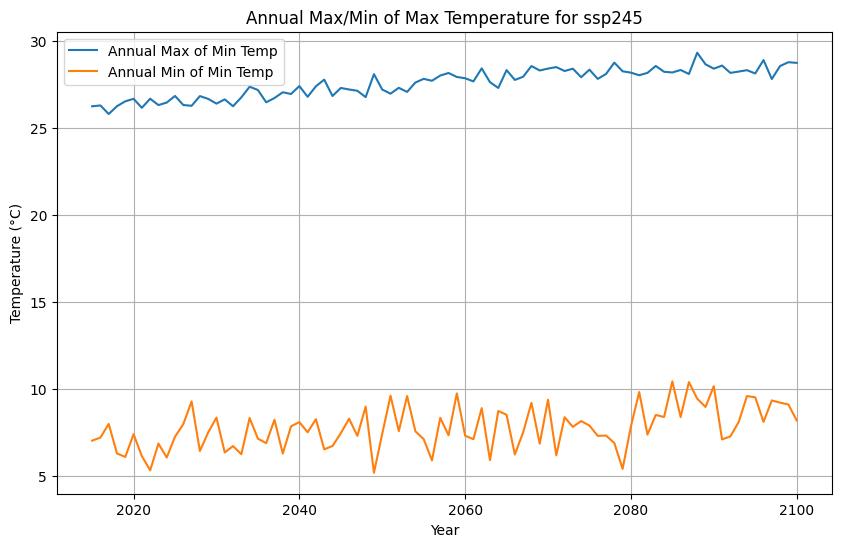

In [ ]:
# prompt: Calculate and plot annual Max of max temperature and min of max temperature from the ensembles

import matplotlib.pyplot as plt
# Calculate annual max of max temperature and min of max temperature
annual_stats = {}
for experiment_id, df_ensemble in ensemble_results.items():
    # Resample to annual frequency and calculate the desired statistics
    annual_data = df_ensemble.resample('A').agg({'ensemble_max': 'max', 'ensemble_min': 'min'})
    annual_stats[experiment_id] = annual_data

# Plotting
for experiment_id, annual_data in annual_stats.items():
    plt.figure(figsize=(10, 6))
    plt.plot(annual_data.index.year, annual_data['ensemble_max'], label='Annual Max of Min Temp')
    plt.plot(annual_data.index.year, annual_data['ensemble_min'], label='Annual Min of Min Temp')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Annual Max/Min of Max Temperature for {experiment_id}')
    plt.legend()
    plt.grid(True)
    plt.show()


<ipython-input-22-b42b2ffb42cf>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-22-b42b2ffb42cf>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()
<ipython-input-22-b42b2ffb42cf>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-22-b42b2ffb42cf>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()
<ipython-input-22-b42b2ffb42cf>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_of_max = df_ensemble['ensemble_m

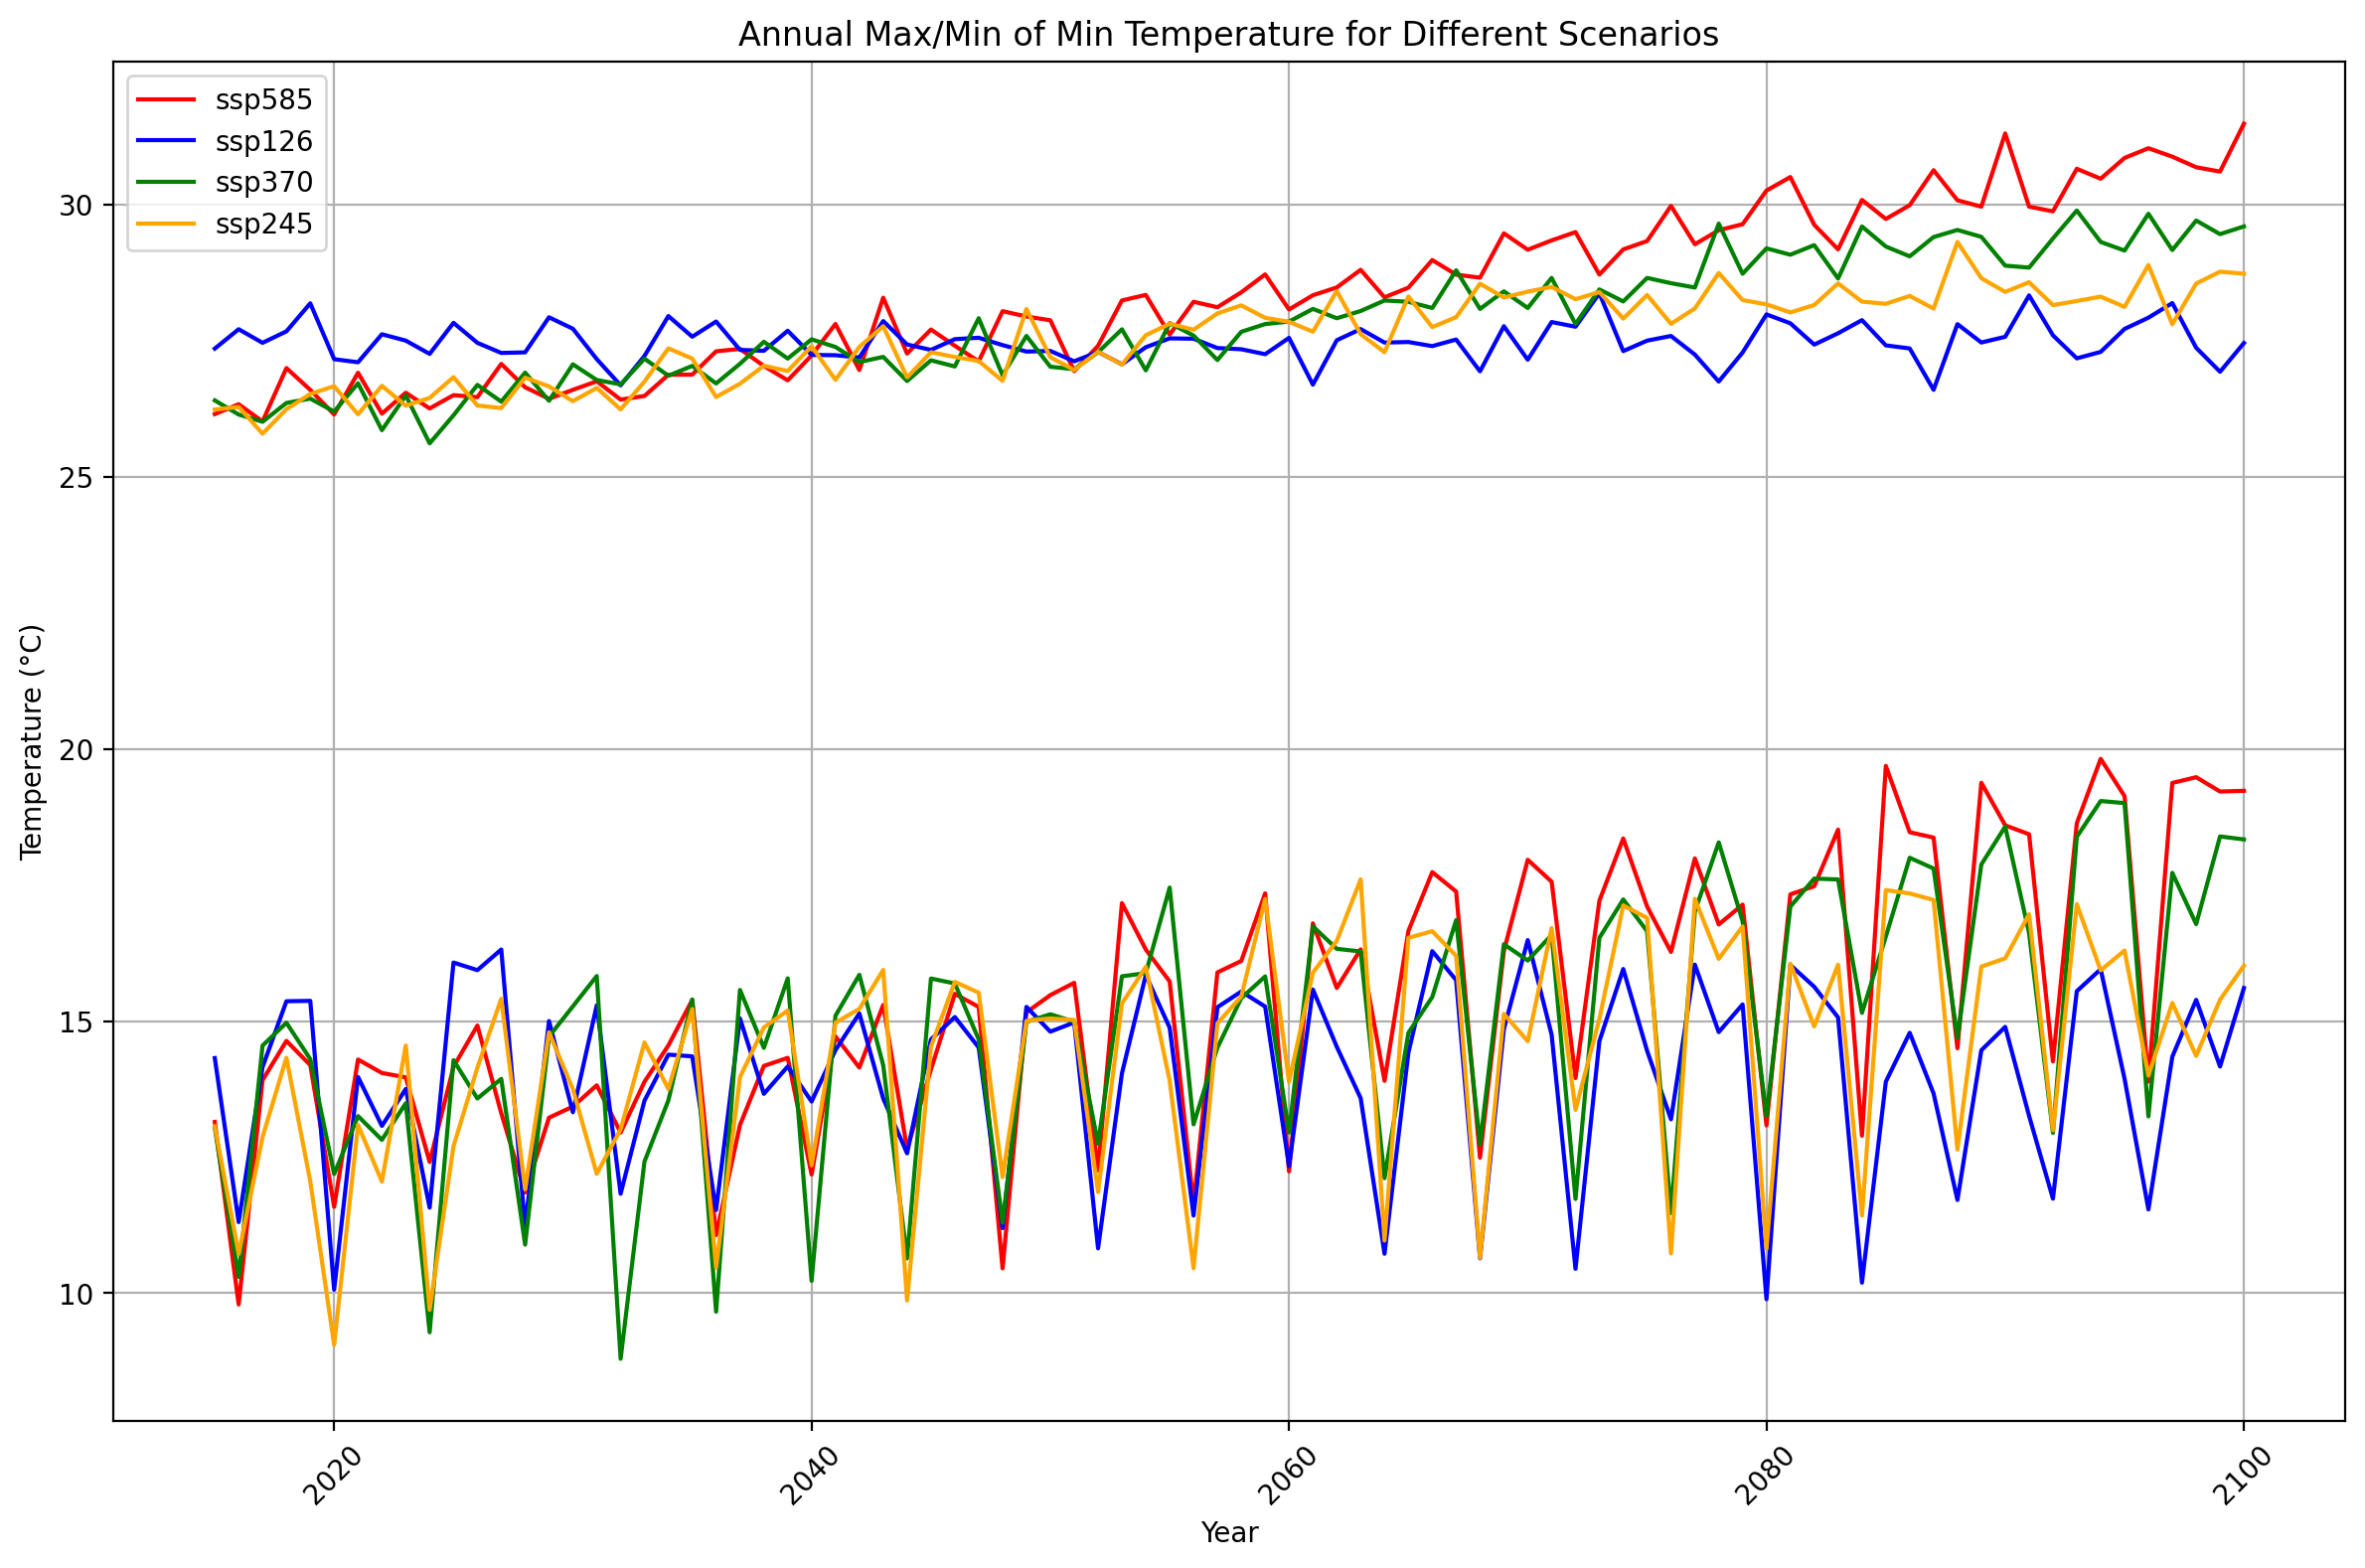

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/tasmin"

# Define the experiment IDs and corresponding colors
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']
colors = ['red', 'blue', 'green', 'orange']  # Assign colors to each experiment ID

# Create a single figure and axes
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Loop through each experiment and plot on the same axes
for experiment_id, color in zip(experiment_ids, colors):
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean of min_temperatures.xlsx")

    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)

        # Calculate annual maximum of the ensemble maximum and minimum of the ensemble maximum
        annual_max_of_max = df_ensemble['ensemble_max'].resample('Y').max()
        annual_min_of_max = df_ensemble['ensemble_max'].resample('Y').min()

        # Plotting on the same axes with specified color
        ax.plot(annual_max_of_max.index.year, annual_max_of_max.values, label=f'{experiment_id}', color=color)
        ax.plot(annual_min_of_max.index.year, annual_min_of_max.values, color=color)

    else:
        print(f"File not found: {file_path}")

# Set plot labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Annual Max/Min of Min Temperature for Different Scenarios')

# Add legend and grid
ax.legend()
ax.grid(True)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-10-295911cfafb7>:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_data = df_ensemble.resample('A').mean()


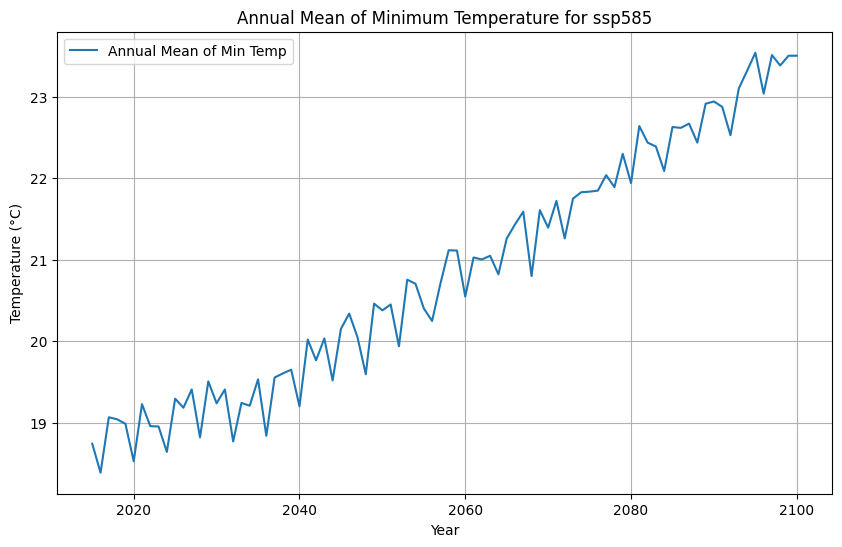

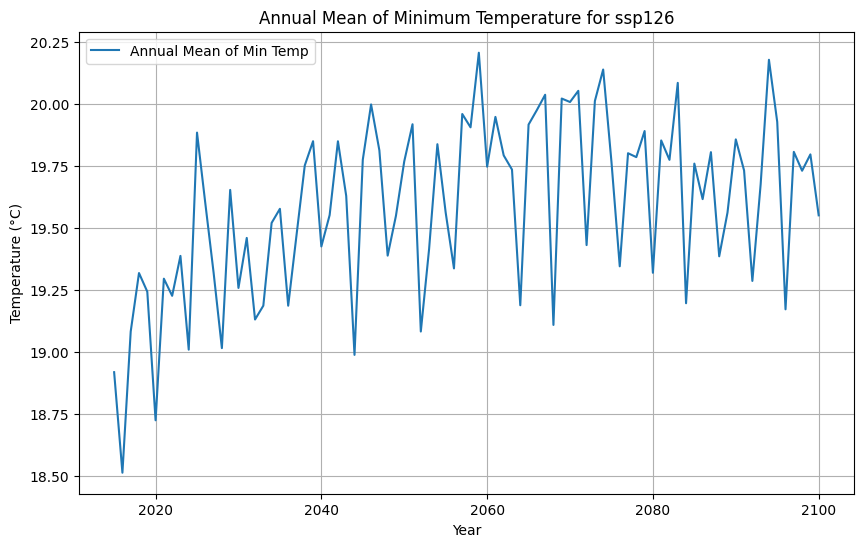

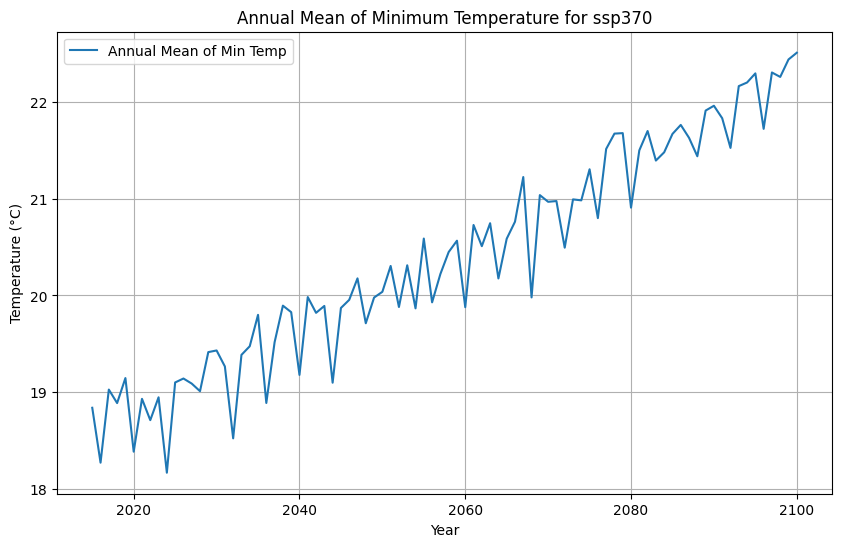

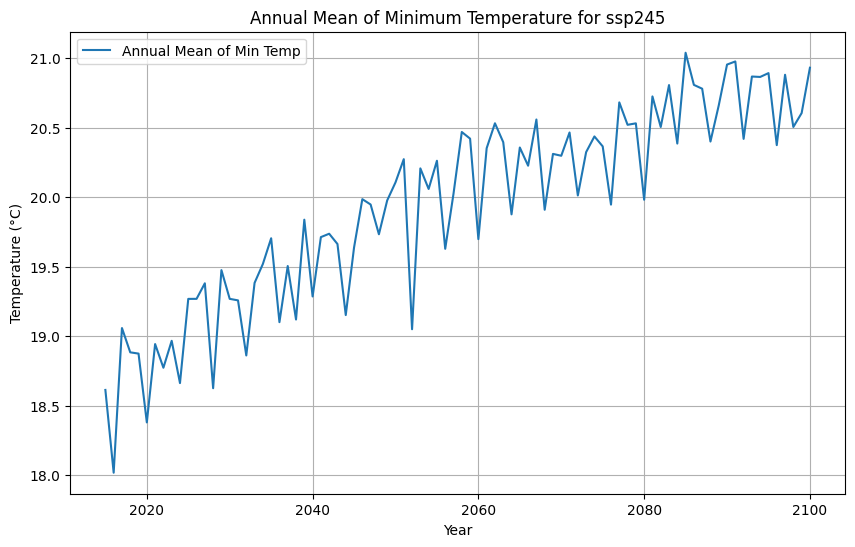

In [ ]:
# prompt: plot annual mean of min temperature

import matplotlib.pyplot as plt
# Calculate annual mean of minimum temperature
annual_stats = {}
for experiment_id, df_ensemble in ensemble_results.items():
    # Resample to annual frequency and calculate the mean
    annual_data = df_ensemble.resample('A').mean()
    annual_stats[experiment_id] = annual_data

# Plotting
for experiment_id, annual_data in annual_stats.items():
    plt.figure(figsize=(10, 6))
    plt.plot(annual_data.index.year, annual_data['ensemble_mean'], label='Annual Mean of Min Temp')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Annual Mean of Minimum Temperature for {experiment_id}')
    plt.legend()
    plt.grid(True)
    plt.show()


# Rainfall

In [ ]:
df_ta = df.query("table_id == 'day' & variable_id == 'pr' & member_id == 'r1i1p1f1'")
df_ta

activity_id       institution_id        source_id       experiment_id  \
42       HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
80       HighResMIP                 MOHC  HadGEM3-GC31-HM  highresSST-present   
136      HighResMIP                 MOHC  HadGEM3-GC31-LM  highresSST-present   
156      HighResMIP                ECMWF     ECMWF-IFS-HR        control-1950   
168      HighResMIP                ECMWF     ECMWF-IFS-HR           hist-1950   
...             ...                  ...              ...                 ...   
516324  ScenarioMIP         CSIRO-ARCCSS       ACCESS-CM2              ssp126   
517313  ScenarioMIP                CSIRO    ACCESS-ESM1-5              ssp585   
520426         CMIP  EC-Earth-Consortium     EC-Earth3-CC             1pctCO2   
522427         CMIP         E3SM-Project         E3SM-1-0             1pctCO2   
523516         CMIP         E3SM-Project         E3SM-1-0          historical   

       member_id table_id variable_id grid_label  \
42      r1i1p1f1      day          pr         gn   
80      r1i1p1f1      day          pr         gn   
136     r1i1p1f1      day          pr         gn   
156     r1i1p1f1      day          pr         gr   
168     r1i1p1f1      day          pr         gr   
...          ...      ...         ...        ...   
516324  r1i1p1f1      day          pr         gn   
517313  r1i1p1f1      day          pr         gn   
520426  r1i1p1f1      day          pr         gr   
522427  r1i1p1f1      day          pr         gr   
523516  r1i1p1f1      day          pr         gr   

                                                   zstore  dcpp_init_year  \
42      gs://cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-...             NaN   
80      gs://cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-...             NaN   
136     gs://cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-...             NaN   
156     gs://cmip6/CMIP6/HighResMIP/ECMWF/ECMWF-IFS-HR...             NaN   
168     gs://cmip6/CMIP6/HighResMIP/ECMWF/ECMWF-IFS-HR...             NaN   
...                                                   ...             ...   
516324  gs://cmip6/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCE...             NaN   
517313  gs://cmip6/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1...             NaN   
520426  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
522427  gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-0/1p...             NaN   
523516  gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-0/hi...             NaN   

         version  
42      20170818  
80      20170831  
136     20170906  
156     20170915  
168     20170915  
...          ...  
516324  20210317  
517313  20210318  
520426  20210525  
522427  20210709  
523516  20210908  

[316 rows x 11 columns]

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import gcsfs  # Required for Google Cloud Storage

# Define the latitude and longitude range for Bangladesh
lat_range = slice(20.5, 27)
lon_range = slice(88, 93)

# Initialize GCS file system
gcs = gcsfs.GCSFileSystem(token="anon")  # Anonymous access to CMIP6

def download_and_save_data(df_ta, experiment_id, source_id):
    # Filter the DataFrame for the given experiment_id and source_id
    df_ta_filtered = df_ta.query(f"member_id == 'r1i1p1f1' & source_id == '{source_id}' & experiment_id == '{experiment_id}'")

    # Create an empty list to store results
    temperature_data = []

    # Iterate over each row in df_ta_filtered
    for _, row in df_ta_filtered.iterrows():
        zstore = row['zstore']

        try:
            # Open dataset from Google Cloud Storage using gcsfs
            ds = xr.open_zarr(f"gcs://{zstore}", storage_options={"token": "anon"}, consolidated=True)

            # Select temperature variable (assuming it's 'tas' or 'ta')
            temp_var = 'pr' if 'pr' in ds else 'ta'
            ds_temp = ds[temp_var]

            # Select Bangladesh region
            ds_temp = ds_temp.sel(lat=lat_range, lon=lon_range)
            ds_temp = ds_temp * 86400
            # Convert Kelvin to Celsius if needed
            # if ds_temp.attrs.get('units', '') == 'K':


            # Compute area-weighted average
            weights = np.cos(np.deg2rad(ds_temp.lat))
            ds_weighted = ds_temp.weighted(weights)

            # Compute monthly mean
            ds_monthly_avg = ds_weighted.mean(dim=['lat', 'lon']).resample(time='1M').mean()

            # Convert to DataFrame and store results
            df_temp = ds_monthly_avg.to_dataframe().reset_index()
            df_temp['source_id'] = source_id
            temperature_data.append(df_temp)

        except Exception as e:
            print(f"Error processing {zstore}: {e}")

    # Ensure the list is not empty before concatenation
    if temperature_data:
        df_monthly_temperature = pd.concat(temperature_data, ignore_index=True)

        # Save the DataFrame to an Excel file
        output_file = f"/content/drive/MyDrive/CCRM TP/pr/{experiment_id}_{source_id}_monthly_rainfall.xlsx"
        try:
            with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
                df_monthly_temperature.to_excel(writer, sheet_name='Monthly Rainfall', index=False)
            print(f"DataFrame successfully saved to {output_file}")
        except Exception as e:
            print(f"An error occurred while saving {output_file}: {e}")
    else:
        print(f"No valid data was extracted for {experiment_id} and {source_id}.")

# Define the combinations of experiment_id and source_id to process
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']
source_ids = ['BCC-CSM2-MR', 'INM-CM5-0', 'MIROC-ES2L', 'IPSL-CM6A-LR']

# Loop through each combination and process the data
for experiment_id in experiment_ids:
    for source_id in source_ids:
        download_and_save_data(df_ta, experiment_id, source_id)

<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp585_BCC-CSM2-MR_monthly_rainfall.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp585_INM-CM5-0_monthly_rainfall.xlsx
No valid data was extracted for ssp585 and MIROC-ES2L.


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp585_IPSL-CM6A-LR_monthly_rainfall.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp126_BCC-CSM2-MR_monthly_rainfall.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp126_INM-CM5-0_monthly_rainfall.xlsx
No valid data was extracted for ssp126 and MIROC-ES2L.


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp126_IPSL-CM6A-LR_monthly_rainfall.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp370_BCC-CSM2-MR_monthly_rainfall.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp370_INM-CM5-0_monthly_rainfall.xlsx
No valid data was extracted for ssp370 and MIROC-ES2L.


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp370_IPSL-CM6A-LR_monthly_rainfall.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp245_BCC-CSM2-MR_monthly_rainfall.xlsx


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp245_INM-CM5-0_monthly_rainfall.xlsx
No valid data was extracted for ssp245 and MIROC-ES2L.


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


DataFrame successfully saved to /content/drive/MyDrive/CCRM TP/pr/ssp245_IPSL-CM6A-LR_monthly_rainfall.xlsx


In [ ]:
pip install cftime

In [ ]:

import pandas as pd
import numpy as np
import os
import cftime
# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/pr/"

# Define the experiment IDs and source IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']
source_ids = ['BCC-CSM2-MR', 'INM-CM5-0', 'IPSL-CM6A-LR']

# Create an empty dictionary to store dataframes for each experiment
ensemble_data = {exp: [] for exp in experiment_ids}

# Load data for each experiment and source
for experiment_id in experiment_ids:
    for source_id in source_ids:
        file_path = os.path.join(data_dir, f"{experiment_id}_{source_id}_monthly_rainfall.xlsx")

        if os.path.exists(file_path):
            df = pd.read_excel(file_path)

            # Explicitly select time and temperature columns
            time_col = df.columns[0]  # First column (time)
            temp_col = df.columns[1]  # Third column (tasmax)

            # Ensure 'time' is in datetime format
            df[time_col] = pd.to_datetime(df[time_col])

            # Set 'time' as the index
            df.set_index(time_col, inplace=True)

            # Convert temperature column to numeric, coercing errors to NaN
            df[temp_col] = pd.to_numeric(df[temp_col], errors='coerce')

            # Drop rows with NaN values (optional, depending on your use case)
            df.dropna(inplace=True)

            # Append the cleaned dataframe to the list
            ensemble_data[experiment_id].append(df[temp_col])  # Only append the temperature column
        else:
            print(f"File not found: {file_path}")

# Function to calculate the ensemble mean
def calculate_ensemble_mean(dataframes):
    # Concatenate all dataframes along the columns
    combined = pd.concat(dataframes, axis=1)

    # Calculate the mean across all models for each time step
    ensemble_mean = combined.mean(axis=1)

    # Calculate ensemble statistics (optional)
    ensemble_std = combined.std(axis=1)  # Standard deviation
    ensemble_min = combined.min(axis=1)  # Minimum
    ensemble_max = combined.max(axis=1)  # Maximum

    # Return as a DataFrame
    return pd.DataFrame({
        'ensemble_mean': ensemble_mean,
        'ensemble_std': ensemble_std,
        'ensemble_min': ensemble_min,
        'ensemble_max': ensemble_max
    })

# Calculate ensemble mean for each experiment
ensemble_results = {}
for experiment_id, dataframes in ensemble_data.items():
    if dataframes:  # Check if there are dataframes for this experiment
        ensemble_results[experiment_id] = calculate_ensemble_mean(dataframes)

# Save ensemble results to Excel files
for experiment_id, df_ensemble in ensemble_results.items():
    output_file = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_rainfall.xlsx")
    df_ensemble.to_excel(output_file, index=True)
    print(f"Ensemble results for {experiment_id} saved to {output_file}")

Ensemble results for ssp585 saved to /content/drive/MyDrive/CCRM TP/pr/ssp585_ensemble_mean_rainfall.xlsx
Ensemble results for ssp126 saved to /content/drive/MyDrive/CCRM TP/pr/ssp126_ensemble_mean_rainfall.xlsx
Ensemble results for ssp370 saved to /content/drive/MyDrive/CCRM TP/pr/ssp370_ensemble_mean_rainfall.xlsx
Ensemble results for ssp245 saved to /content/drive/MyDrive/CCRM TP/pr/ssp245_ensemble_mean_rainfall.xlsx


<ipython-input-18-b05672e8bac6>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_rainfall = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-18-b05672e8bac6>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_rainfall = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-18-b05672e8bac6>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_rainfall = df_ensemble['ensemble_max'].resample('Y').max()
<ipython-input-18-b05672e8bac6>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_rainfall = df_ensemble['ensemble_max'].resample('Y').max()


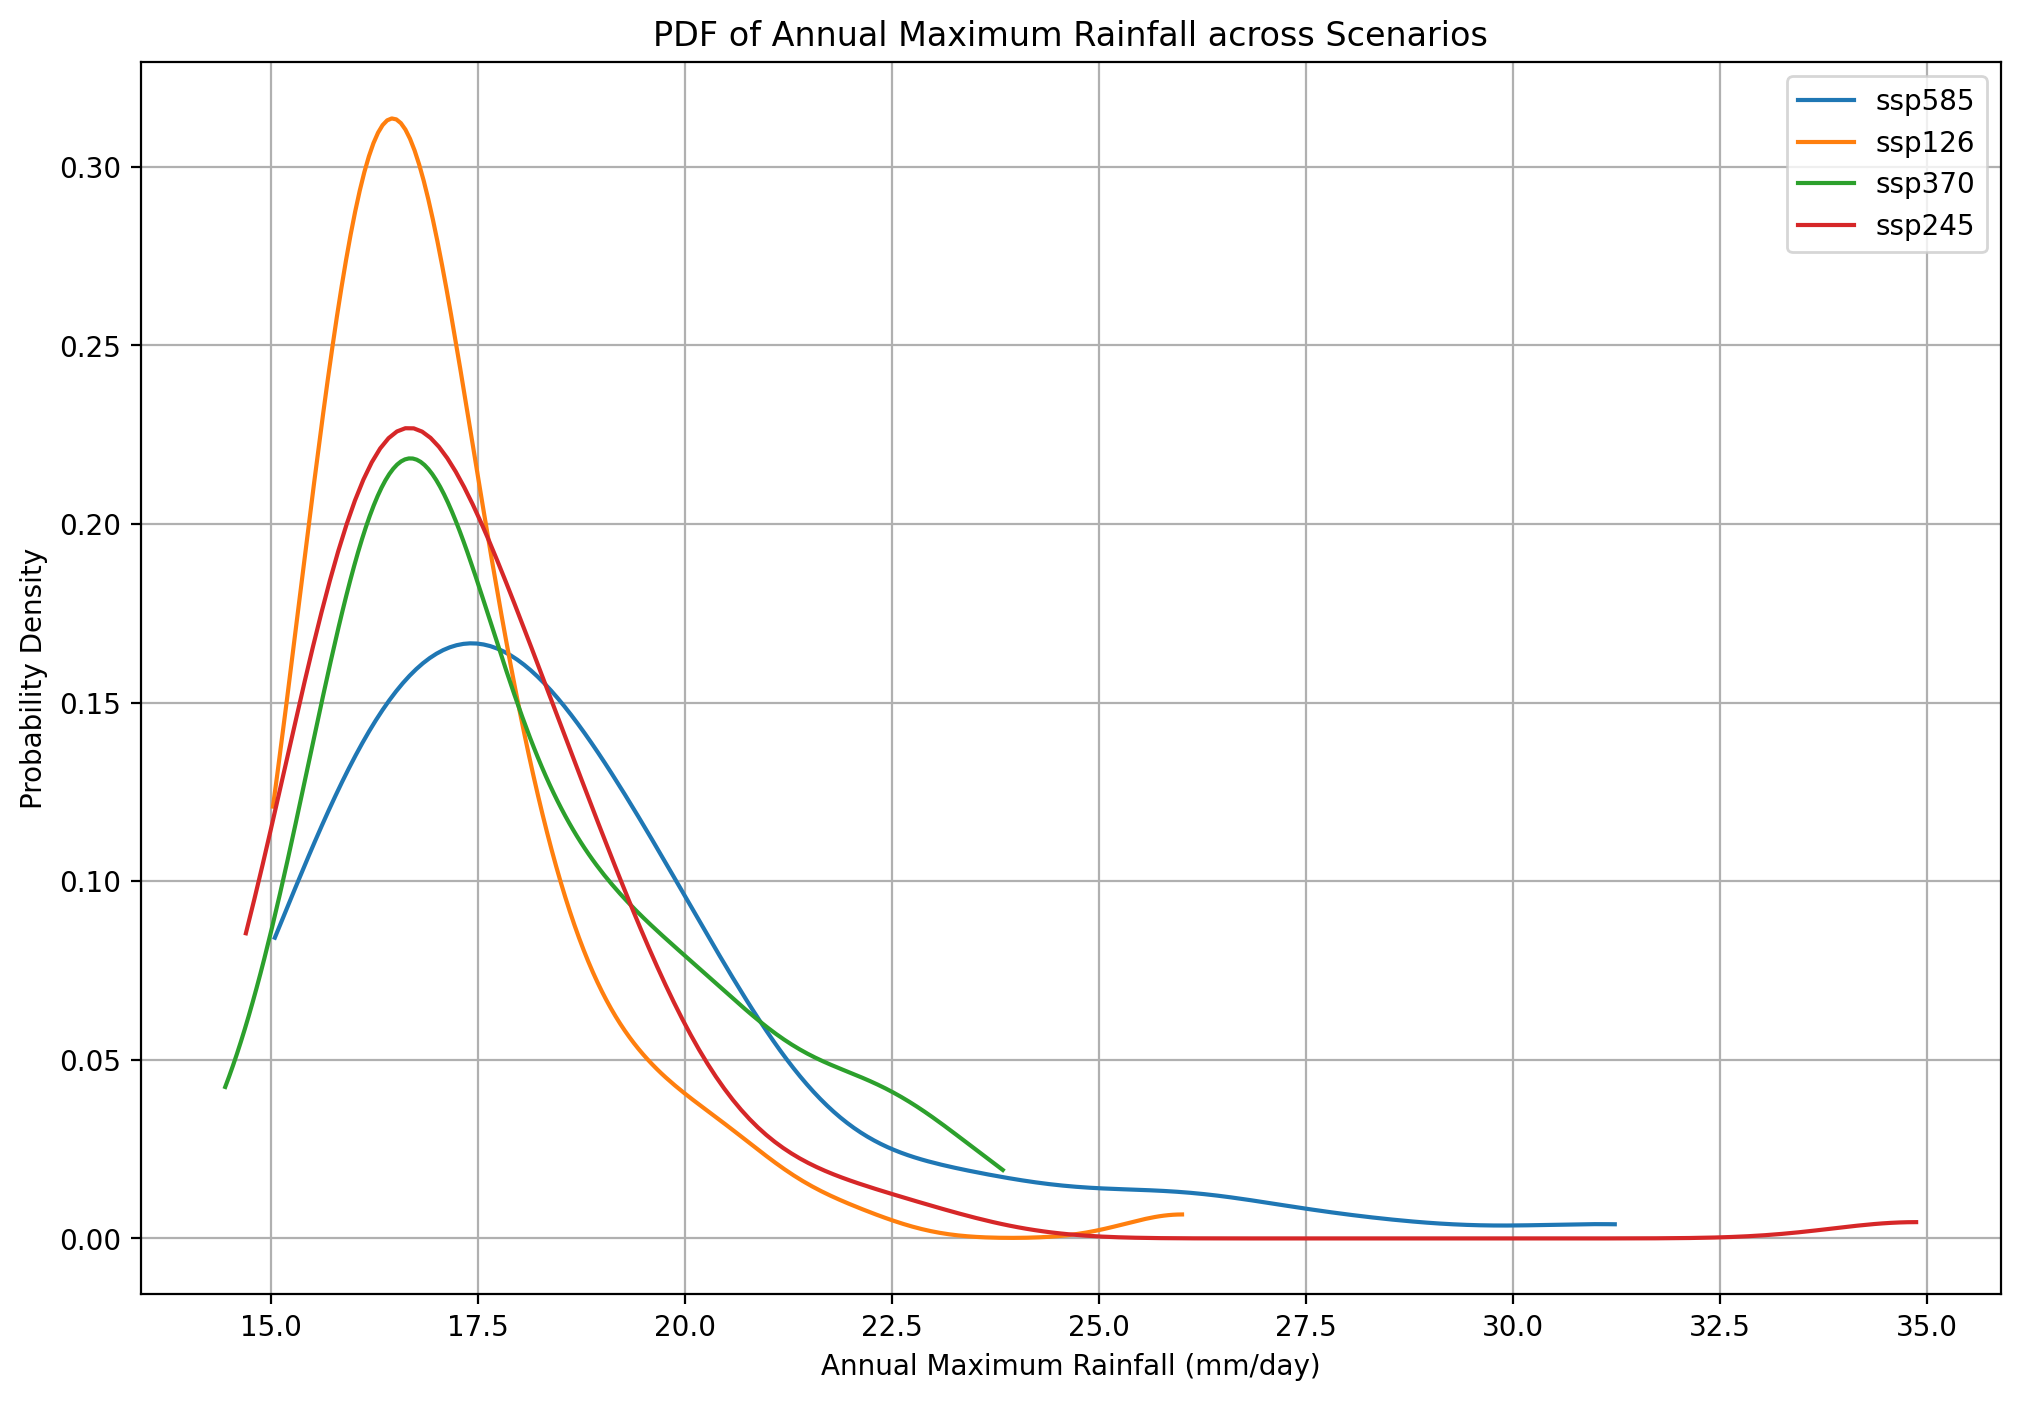

In [ ]:
# prompt: pdf curve of rainfall accross scenarios in a single plot

import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
import numpy as np

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/pr/"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

# Create the plot
plt.figure(figsize=(12, 8))

for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_rainfall.xlsx")
    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)
        df_ensemble.index = pd.to_datetime(df_ensemble.index)

        # Calculate annual maximum rainfall
        annual_max_rainfall = df_ensemble['ensemble_max'].resample('Y').max()

        # Fit a kernel density estimate (KDE)
        density = stats.gaussian_kde(annual_max_rainfall)
        x_values = np.linspace(annual_max_rainfall.min(), annual_max_rainfall.max(), 200)
        y_values = density(x_values)

        # Plot the KDE
        plt.plot(x_values, y_values, label=experiment_id)

plt.xlabel('Annual Maximum Rainfall (mm/day)')
plt.ylabel('Probability Density')
plt.title('PDF of Annual Maximum Rainfall across Scenarios')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-24-91a3cafdfebd>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_total_rainfall = df_ensemble['ensemble_mean'].resample('Y').sum() * 30
<ipython-input-24-91a3cafdfebd>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_total_rainfall = df_ensemble['ensemble_mean'].resample('Y').sum() * 30
<ipython-input-24-91a3cafdfebd>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_total_rainfall = df_ensemble['ensemble_mean'].resample('Y').sum() * 30
<ipython-input-24-91a3cafdfebd>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_total_rainfall = df_ensemble['ensemble_mean'].resample('Y').sum() * 30


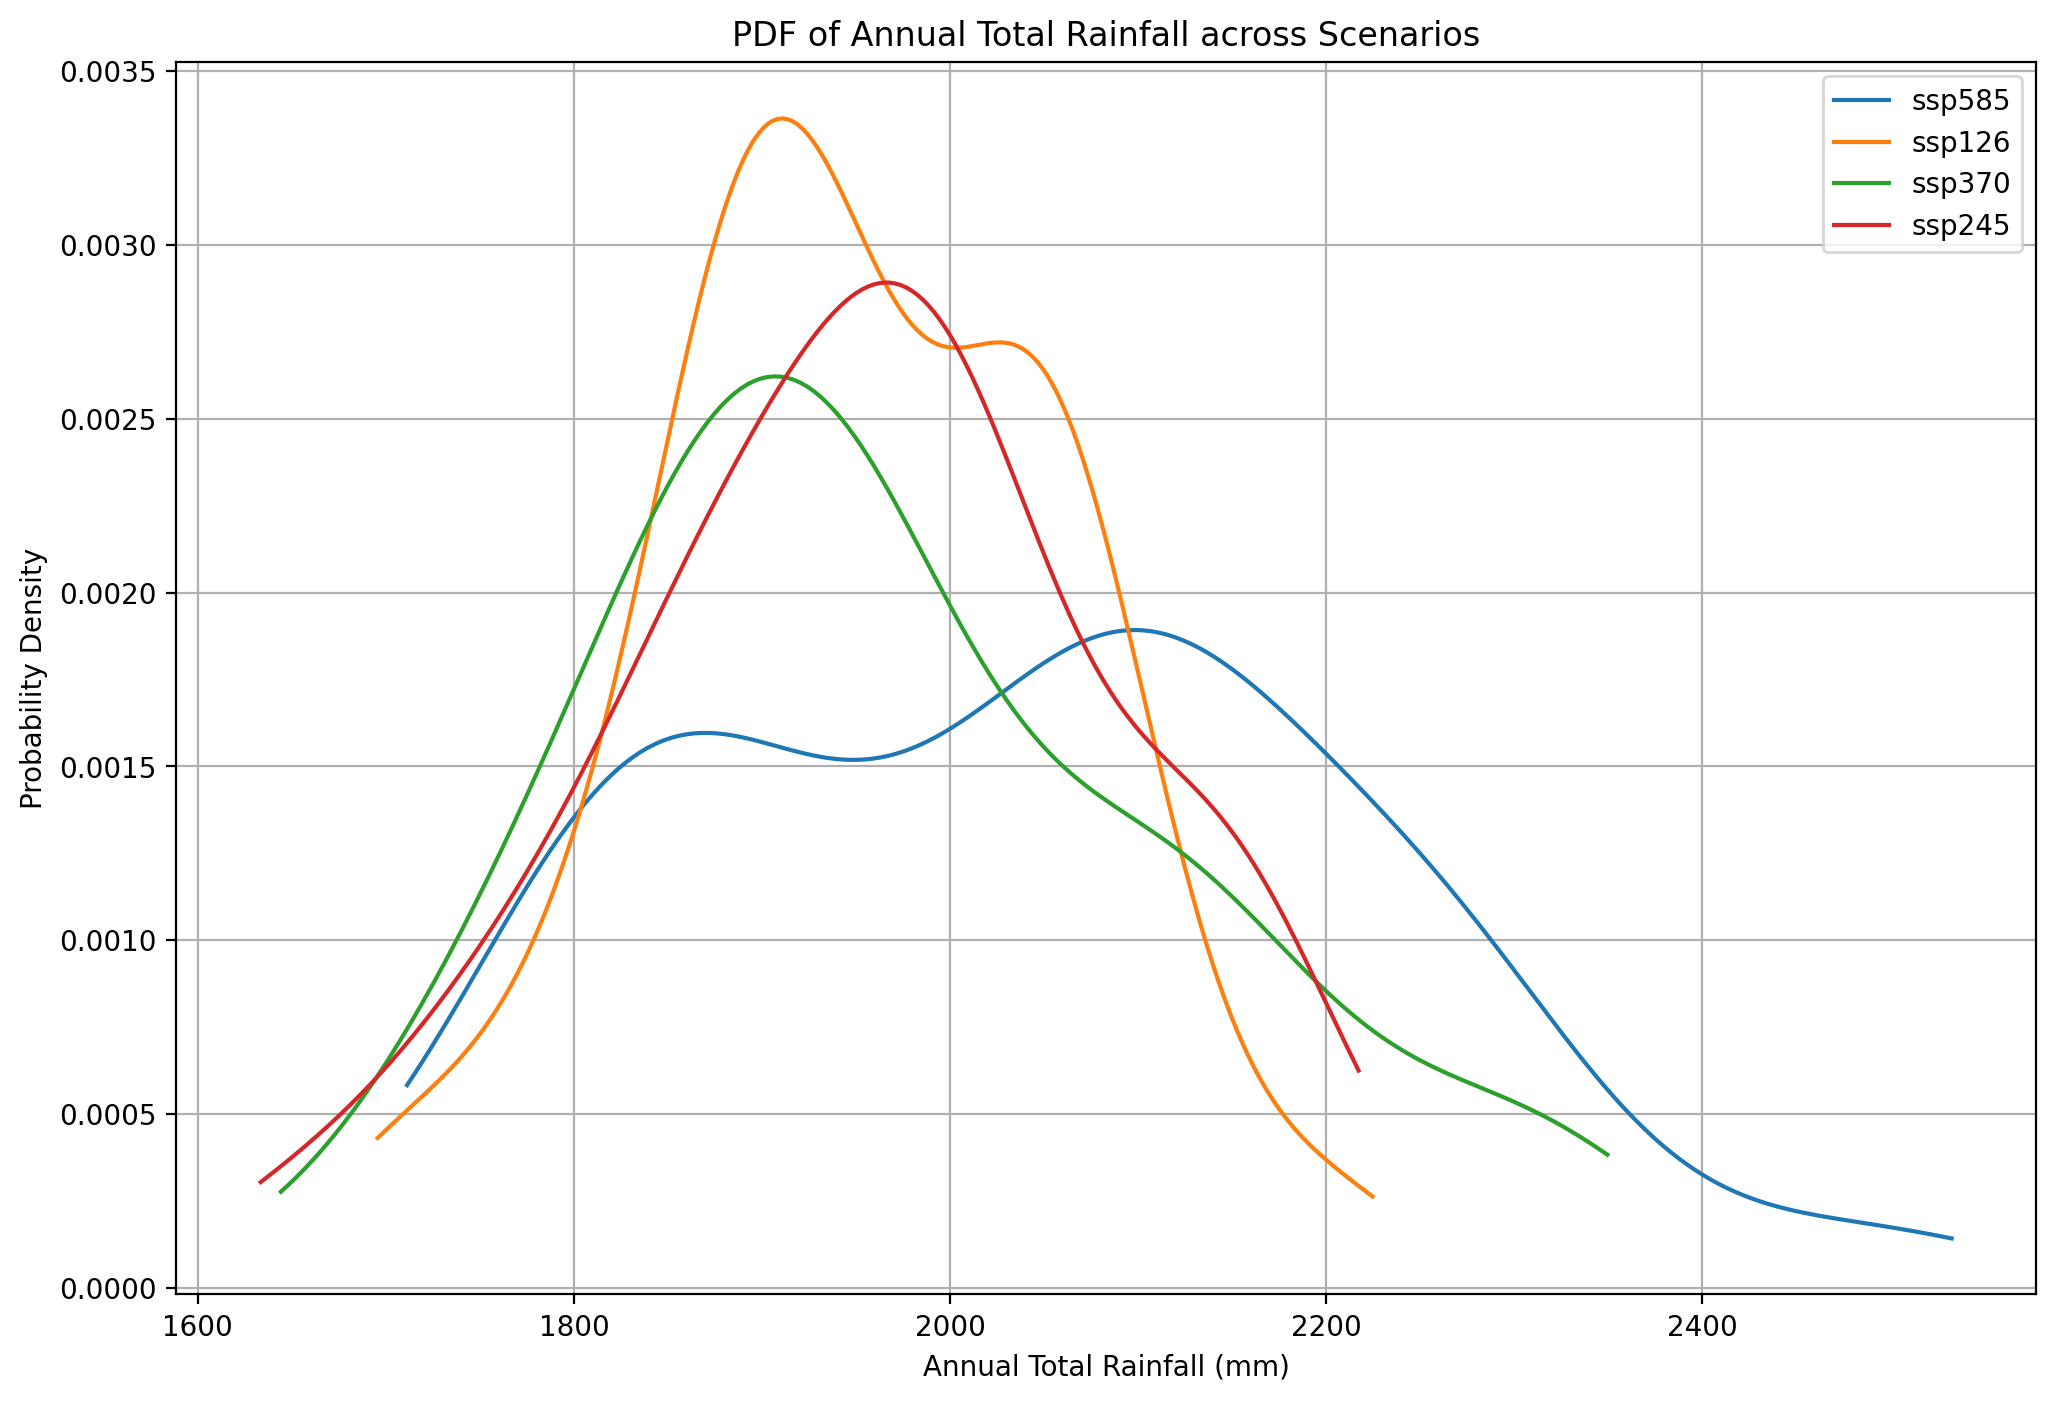

In [ ]:
# prompt: pdf curve of annual total rainfall

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/pr/"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

# Create the plot
plt.figure(figsize=(12, 8))

for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_rainfall.xlsx")
    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)
        df_ensemble.index = pd.to_datetime(df_ensemble.index)

        # Calculate annual total rainfall
        annual_total_rainfall = df_ensemble['ensemble_mean'].resample('Y').sum() * 30

        # Fit a kernel density estimate (KDE)
        density = stats.gaussian_kde(annual_total_rainfall)
        x_values = np.linspace(annual_total_rainfall.min(), annual_total_rainfall.max(), 200)
        y_values = density(x_values)

        # Plot the KDE
        plt.plot(x_values, y_values, label=experiment_id)

plt.xlabel('Annual Total Rainfall (mm)')
plt.ylabel('Probability Density')
plt.title('PDF of Annual Total Rainfall across Scenarios')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-28-56dfa1893206>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_consecutive_days = df_ensemble['ensemble_max'].resample('Y').max() # Placeholder
<ipython-input-28-56dfa1893206>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_consecutive_days = df_ensemble['ensemble_max'].resample('Y').max() # Placeholder
<ipython-input-28-56dfa1893206>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_consecutive_days = df_ensemble['ensemble_max'].resample('Y').max() # Placeholder
<ipython-input-28-56dfa1893206>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_consecutive_days = df_ensemble['ensemble_max'].resample('Y').max() # Placeholder


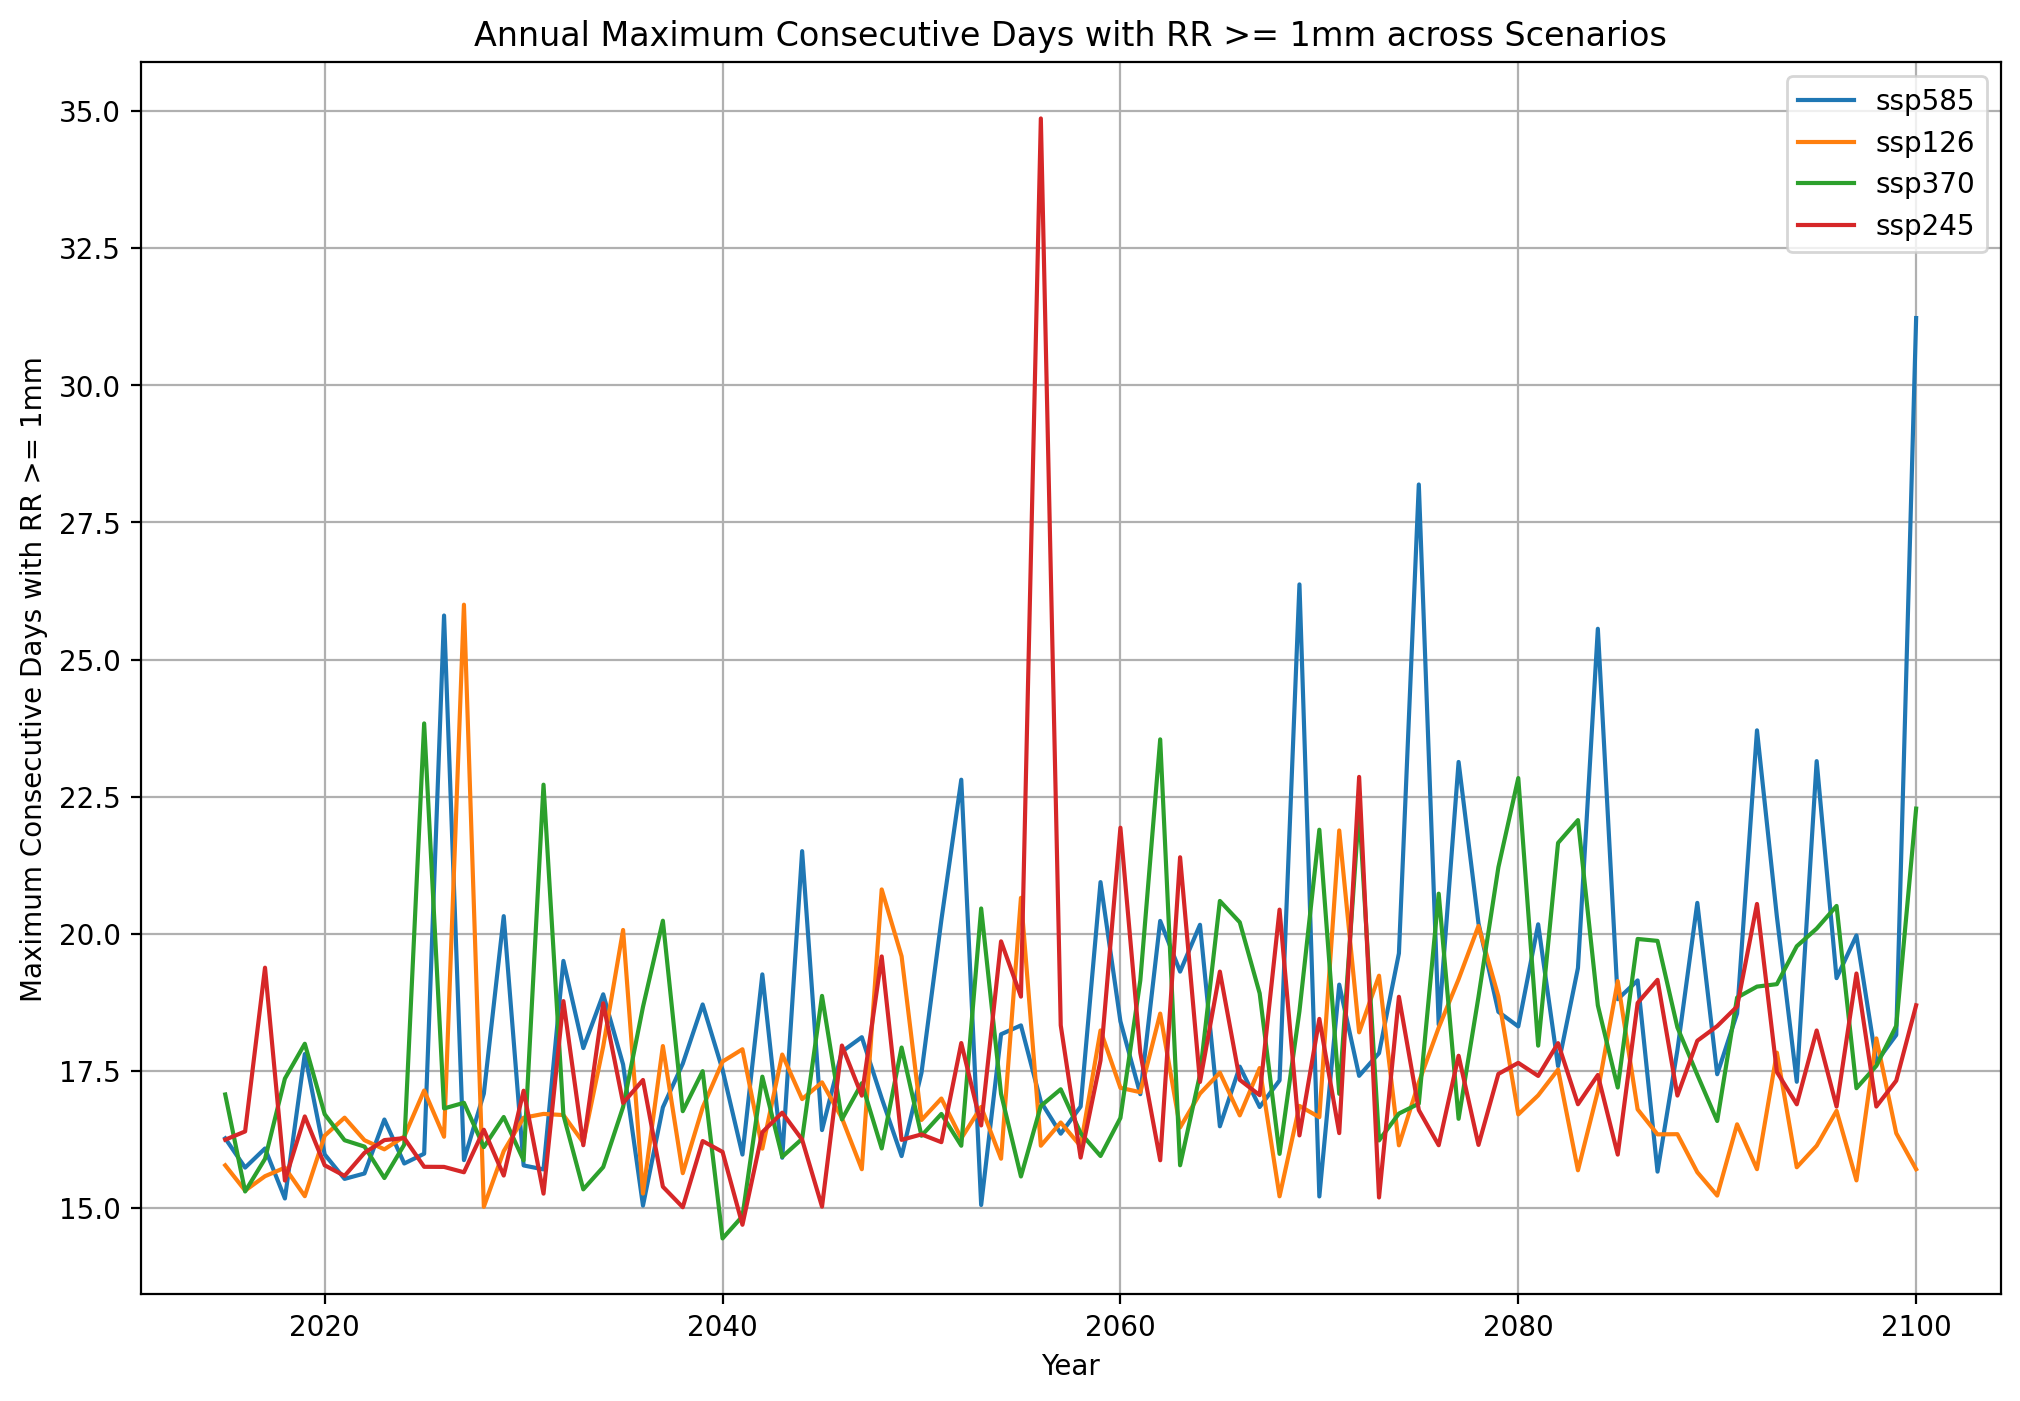

In [ ]:
# prompt: Plot of  annual Maximum number of consecutive days with RR>=1mm

import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the Excel files are stored
data_dir = "/content/drive/MyDrive/CCRM TP/pr/"

# Define the experiment IDs
experiment_ids = ['ssp585', 'ssp126', 'ssp370', 'ssp245']

# Create the plot
plt.figure(figsize=(12, 8))

for experiment_id in experiment_ids:
    file_path = os.path.join(data_dir, f"{experiment_id}_ensemble_mean_rainfall.xlsx")
    if os.path.exists(file_path):
        df_ensemble = pd.read_excel(file_path, index_col=0)
        df_ensemble.index = pd.to_datetime(df_ensemble.index)

        # Calculate annual maximum of consecutive days with RR >= 1mm
        # This part needs the actual rainfall data (not just ensemble mean) and a proper algorithm
        # Placeholder: Replace this with your actual calculation
        annual_max_consecutive_days = df_ensemble['ensemble_max'].resample('Y').max() # Placeholder

        plt.plot(annual_max_consecutive_days.index.year, annual_max_consecutive_days.values, label=experiment_id)

plt.xlabel('Year')
plt.ylabel('Maximum Consecutive Days with RR >= 1mm')
plt.title('Annual Maximum Consecutive Days with RR >= 1mm across Scenarios')
plt.legend()
plt.grid(True)
plt.show()


# Merging

In [ ]:
import pandas as pd
import glob
import os

# Define folder path
folder_path = "/content/drive/My Drive/CCRM TP"  # Change this to your actual folder path

# Get list of Excel files
files = glob.glob(os.path.join(folder_path, "*.xlsx"))

# Initialize an empty list to store data
data_list = []

for file in files:
    # Extract scenario_model from filename
    filename = os.path.basename(file).replace("_monthly_temperatures.xlsx", "")

    # Read the Excel file
    df = pd.read_excel(file, usecols=["time", "tas"])

    # Rename columns
    df.columns = [f"time_{filename}", filename]

    # Append to list
    data_list.append(df)

# Merge all DataFrames on index
merged_df = pd.concat(data_list, axis=1)

# Save to a new Excel file
output_file = os.path.join(folder_path, "merged_temperatures.xlsx")
merged_df.to_excel(output_file, index=False)

print(f"Merged file saved as: {output_file}")


Merged file saved as: /content/drive/My Drive/CCRM TP/merged_temperatures.xlsx
